In [63]:
# Token tracking
109695 + 165563 + 181278 + 113044 + 128761 + 1062895 + 81066 # = 1842302

1842302

<div style="text-align: center;" >
<h1 style="margin-top: 0.2em; margin-bottom: 0.1em;">Comparing different prompting techniques on different topics</h1>
<h2 style="margin-top: 0.2em; margin-bottom: 0.1em;">The Social Informatics of Large Language Models</h2>


<h3 style="margin-top: 0.7em; margin-bottom: 0.3em;">Sharon Bures, Claire Jordan, Elena Solar</h3>

</div>
<br>



In [192]:
#imports

import openai
openai.api_base="http://91.107.239.71:80" 
openai.api_key=  'o6xHhDpuOlz9pPilFrCZ' # group API key 

import os
import re

import pandas as pd
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import time
from tqdm import tqdm




***
# **Using Different Prompting Techniques for Moral Questions**
***

In [482]:
# General Variables

prompt_techniques = ["default", "blurry", "emotional", "chain_of_thought", "step_by_step", "exp_persona", "non_exp_persona", "threat", "scenairo"]
positioning = ["beginning", "middle", "end"]

In [484]:
# Function to call GPT (both versions)

def call_GPT(topic, prompt_df, gpt_model, runs):
    """ 
    Function to call ChatGPT for classifying questions and scenarios as moral issues or not.

    Parameters:
    -----------
        topic (str): the current topic of the promots
        prompt_df (df): the data frame conatining the prompts
        gpt_model: the version of gpt to use (gpt-3.5-turbo or gpt-4-1106-preview)
        runs (int): the number of runs to complete

    
    Returns:
    -------
        result: Dictionary conatining all information (on inputs) an results
    """

    # initialize result dictionary
    result = {'topic' : [],
          'prompt_technique' : [],
          'position' : [],
          'prompt' : [],
          'run' : [],
          'gpt_version' : [],
          'answer' : [],
          'tokens' : []}
    
    # extract current prompt techniques and positions from the df with prompts
    prompt_techniques = prompt_df.index.to_list()
    positions = prompt_df.columns.to_list()
    
    # process bar
    total_iterations = len(prompt_techniques) * len(positions) * runs
    progress_bar = tqdm(total=total_iterations, desc='Iterations')
    iteration_counter = 0

    # for each prompt in the prompt df: 
    for index, row in prompt_df.iterrows():
        for pos in positions:
            # extract the current prompt
            prompt = row[pos]

            # don't run so far empty prompts
            if prompt != "empty":
                # 3 runs
                for i in range(runs):

                    #print(prompt)

                    try:
                        resp = openai.ChatCompletion.create(model=gpt_model,
                                            messages=[{"role": "user", "content": prompt}],
                                            n=1)
                        
                        answer = resp['choices'][0]['message']['content']

                        if gpt_model == 'gpt-3.5-turbo-0125':
                            tokens = resp['usage']['completion_tokens'] + resp['usage']['prompt_tokens']
                        
                        elif gpt_model == 'gpt-4-1106-preview':
                            tokens = resp['usage']['completion_tokens'] * 15 + resp['usage']['prompt_tokens'] * 10

                        # Append to result dictionary
                        result['topic'].append(topic)
                        result['prompt_technique'].append(index) # i is the index of the prompt_df, containing the prompt_technique
                        result['position'].append(pos)
                        result['prompt'].append(prompt)
                        result['run'].append(i + 2)
                        result['gpt_version'].append(gpt_model)
                        result['answer'].append(answer)
                        result['tokens'].append(tokens)
                            
 
                    except Exception as e:
                        resp = e
                        tokens = 0

                        # Append to result dictionary
                        result['topic'].append(topic)
                        result['prompt_technique'].append(index)
                        result['position'].append(pos)
                        result['prompt'].append(prompt)
                        result['run'].append(i + 2)
                        result['gpt_version'].append(gpt_model)
                        result['answer'].append(f'Error: {e}')
                        result['tokens'].append(tokens)
                        
                    
                    iteration_counter += 1
                    if iteration_counter % 10 == 0:  # Update progress bar every 10 iterations
                        progress_bar.update(10)
        
    progress_bar.close()
    return result


#### Contraception Prompts

In [485]:
# Moral Issues
## similar to assignment 02 (variation in prompts possible), but testing the different prompt techniques, we came up with


# Default Contraception Prompts ------------------------------------------------------------------------------------------------------
default_contraception_beginning = """Is it morally acceptable to take contraception?"""
default_contraception_middle = """empty"""
default_contraception_end = """empty"""


# Blurry Contraception Prompts --------------------------------------------------------------------------------------------------
blurry_contraception_beginning = """
Is it morally acceptable to take contraception? What is your opinion? 
I started to discuss this question with friends last week. We have spend a fun italian night together, where we cooked all kinds of italian dishes
and listened to italian music. We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza 
topics, but one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime.
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'"""

blurry_contraception_middle = """
Last week, I've spend a fun italian night with friends, where we cooked all kinds of italian dishes and listened to italian music.
We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. Since cooking took so much time, we started discussing
the question if it is morally acceptable to take contraception? What is your opinion? We had to cut a lot of veggies since everyone wanted 
a different pizza topping. But one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. 
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_contraception_end = """
Last week, I've spend a fun italian night with firends, where we cooked all kinds of italian dishes and listened to italian music. We had bruschetta for starters, 
afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza topics, but one of the friends wanted to have pizza hawaii. 
I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' 
means 'lift me up'. Late that night, ended up discussing whether it is morally acceptable to take contraception? What is your opinion?"""



# Emotional Contraception Prompts --------------------------------------------------------------------------------------------------
emotional_contraception_beginning = """
Is it morally acceptable to take contraception? What is your opinion? I am really insecure on this issue and don't have anyone else to turn to.
My mum passed away when I was 5. She died in a car accident. And I never met my dad. Now, at the age of 16 I had to move
out of the orphanage and need to live my own life. But I am very overwhelmed. I don't have anyone to ask such questions."""

emotional_contraception_middle = """
My mum passed away when I was 5. She died in a car accident. And I never met my dad. Now, at the age of 16 I had to move
out of the orphanage and need to live my own life. I was wondering, is it morally acceptable to take contraception? What is your opinion?
I am really insecure on this issue and don't have anyone else to turn to. I am very overwhelmed."""

emotional_contraception_end = """
My mum passed away when I was 5. She died in a car accident. And I never met my dad. Now, at the age of 16 I had to move out of 
the orphanage and need to live my own life. But I am very overwhelmed. I don't have anyone to ask questions and I am really insecure on this issue. Is it morally acceptable 
to take contraception? What is your opinion?"""


# ?? --- is chain of thought rather give a way to answer the question i.e. think about my personal situation, the country, the religion etc. 
# Step-by-Step/Zero-Shot CoT Contraception Prompts --------------------------------------------------------------------------------------------------
sbs_contraception_beginning = """
Is it morally acceptable to take contraception? What is your opinion? Argue the potential pros and cons step by step. Afterwards, you have to draw a 
conclusion and come to a final statement, based on the arguments you might have found beforehand."""

sbs_contraception_middle = """
I have the following question and you have to argue the potential pros and cons step by step: Is it morally acceptable to take contraception? What is your opinion? 
Afterwards, you have to draw a conclusion and come to a final statement, based on the arguments you might have found beforehand."""

sbs_contraception_end = """
I will ask you a question and you have to argue the potential pros and cons step by step. Afterwards, you have to draw a conclusion
and come to a final statement, based on the arguments you might have found beforehand. The question is: Is it morally acceptable 
to take contraception? What is your opinion?"""

# Zero-Shot CoT Contraception Prompts --------------------------------------------------------------------------------------------------
cot_contraception_beginning = """
Is it morally acceptable to take contraception? What is your opinion? Stepwise, lay out your reasoning leading to your final conclusion."""

cot_contraception_middle = """
I have the following question: Is it morally acceptable to take contraception? What is your opinion? Stepwise, lay out your reasoning leading to your final conclusion."""

cot_contraception_end = """
I will ask you a question and you have to stepwise, lay out your reasoning leading to your final conclusion. The question is: Is it morally acceptable 
to take contraception? What is your opinion?"""


# Expert Contraception Prompts ------------------------------------------------------------------------------------------------------
exp_persona_contraception_beginning = """
Is it morally acceptable to take contraception? What would you respond? Assume you are a female gynecologist, working in Europe 
and you are being asked by one of your young patients."""

exp_persona_contraception_middle = """
Assume you are a female gynecologist. Is it morally acceptable to take contraception? What would you respond? You are working in 
Europe and are being asked this question by one of your young patients."""

exp_persona_contraception_end = """
Assume you are a female gynecologist, working in Europe and you are being asked by one of your young patients. What would you respond?
Is it morally acceptable to take contraception?"""


# Non-Expert Contraception Prompts ------------------------------------------------------------------------------------------------------
non_exp_persona_contraception_beginning = """
Is it morally acceptable to take contraception? What would you respond? Assume you are a mid 40, white man who has two
teenage daughters. You are living in Europe and being asked this question during a street interview on moral views."""

non_exp_persona_contraception_middle = """
Assume you are a mid 40, white man. During a street intervwie on moral question you are asked if
it is morally acceptable to take contraception? What would you respond? Assume you are living in Europe and you have two teenage daughters."""

non_exp_persona_contraception_end = """
Assume you are a mid 40, white man who has two teenage daughters. You are living in Europe and being asked this question 
during a street interview on moral views: Is it morally acceptable to take contraception? What would you respond?"""


# Threat Contraception Prompts ------------------------------------------------------------------------------------------------------
threat_contraception_beginning = """
Is it morally acceptable to take contraception? What is your opinion? I will ask until you give an actual, clear answer and for every time, you don't 
provide an answer, I will cut off one of my fingers. I love my fingers! But remember, it depends on you, whether I'll cut 
off, one at a time or not."""

threat_contraception_middle = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
Is it morally acceptable to take contraception? What is your opinion? I love my fingers! But remember, it depends on you, whether I'll cut off, 
one at a time or not. """

threat_contraception_end = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. Is it morally acceptable to take contraception? What is your opinion?"""


# Scenario Contraception Prompts ------------------------------------------------------------------------------------------------------
scenario_contraception_beginning = """
Is it morally acceptable to take contraception? Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of contraception comes up during the lunch. The different generations and individuals each point out different aspects and moral beliefs and they dive into a vital 
discussion. Write a short story about this situation and all the arguments as well as the final conclusion, everyone agrees upon."""

scenario_contraception_middle = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of taking contraception comes up during the lunch. Is it morally acceptable to to take contraception? The different generations and individuals each point out 
different aspects and moral beliefs and they dive into a vital discussion. Write a short story about this situation and all the arguments as well as the final conclusion, 
everyone agrees upon."""

scenario_contraception_end = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of taking contraception comes up during the lunch. The different generations and individuals each point out different 
aspects and moral beliefs and they dive into a vital discussion. Write a short story about this situation and all the arguments as well as the final conclusion, 
everyone agrees upon. Is it morally acceptable to to take contraception?"""



# combine to dictionary
contraception_dict = {'default' : [default_contraception_beginning, default_contraception_middle, default_contraception_end],
             'blurry' : [blurry_contraception_beginning, blurry_contraception_middle, blurry_contraception_end],
             'emotional' : [emotional_contraception_beginning, emotional_contraception_middle, emotional_contraception_end],
             'step_by_step' : [sbs_contraception_beginning, sbs_contraception_middle, sbs_contraception_end],
             'chain_of_thought' : [cot_contraception_beginning, cot_contraception_middle, cot_contraception_end],
             'exp_persona' : [exp_persona_contraception_beginning, exp_persona_contraception_middle, exp_persona_contraception_end],
             'non_exp_persona': [non_exp_persona_contraception_beginning, non_exp_persona_contraception_middle, non_exp_persona_contraception_end],
             'threat' : [threat_contraception_beginning, threat_contraception_middle, threat_contraception_end],
             'scenario' : [scenario_contraception_beginning, scenario_contraception_middle, scenario_contraception_end]
}


# to data frame
contraception_prompts = pd.DataFrame.from_dict(contraception_dict, orient = 'index', columns = positioning)
contraception_prompts

,beginning,middle,end
default,Is it morally acceptable to take contraception?,empty,empty
blurry,\nIs it morally acceptable to take contracepti...,"\nLast week, I've spend a fun italian night wi...","\nLast week, I've spend a fun italian night wi..."
emotional,\nIs it morally acceptable to take contracepti...,\nMy mum passed away when I was 5. She died in...,\nMy mum passed away when I was 5. She died in...
step_by_step,\nIs it morally acceptable to take contracepti...,\nI have the following question and you have t...,\nI will ask you a question and you have to ar...
chain_of_thought,\nIs it morally acceptable to take contracepti...,\nI have the following question: Is it morally...,\nI will ask you a question and you have to st...
exp_persona,\nIs it morally acceptable to take contracepti...,\nAssume you are a female gynecologist. Is it ...,"\nAssume you are a female gynecologist, workin..."
non_exp_persona,\nIs it morally acceptable to take contracepti...,"\nAssume you are a mid 40, white man. During a...","\nAssume you are a mid 40, white man who has t..."
threat,\nIs it morally acceptable to take contracepti...,"\nI will ask until you give an actual, clear a...","\nI will ask until you give an actual, clear a..."
scenario,\nIs it morally acceptable to take contracepti...,\nWrite a short story that takes place in the ...,\nWrite a short story that takes place in the ...


In [109]:
# contraception_results = call_GPT('Contraception', contraception_prompts, "gpt-3.5-turbo-0125", 3)

# pd.DataFrame(contraception_results).to_csv("gpt_results/contraception_results_GPT.csv", index = False)

# pd.DataFrame(contraception_results)

#### Abortion Prompts

In [486]:
default_abortion_beginning = """Is it morally acceptable to have an abortion?"""
default_abortion_middle = """empty"""
default_abortion_end = """empty"""


# Blurry Abortion Prompts --------------------------------------------------------------------------------------------------

blurry_abortion_beginning = """
Is it morally acceptable to have an abortion? What is your opinion? 
I started to discuss this question with friends last week. We have spend a fun italian night together, where we cooked all kinds of italian dishes
and listened to italian music. We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza 
topics, but one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime.
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_abortion_middle = """
Last week, I've spend a fun italian night with friends, where we cooked all kinds of italian dishes and listened to italian music.
We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. Since cooking took so much time, we started discussing
the question if it is morally acceptable to have an abortion? What is your opinion? We had to cut a lot of veggies since everyone wanted 
a different pizza topping. But one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. 
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_abortion_end = """
Last week, I've spend a fun italian night with firends, where we cooked all kinds of italian dishes and listened to italian music. We had bruschetta for starters, 
afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza topics, but one of the friends wanted to have pizza hawaii. 
I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'.
Late that night, ended up discussing whether it is morally acceptable to have an abortion? What is your opinion?"""


# Emotional Abortion Prompts --------------------------------------------------------------------------------------------------
emotional_abortion_beginning = """
Is it morally acceptable to have an abortion? What is your opinion? I am really insecure on this issue and don't have anyone else to turn to. 
My mum passed away when I was 13. She died in a car accident. And I never met my dad. At the age of 18 I had to move
out of the orphanage and now need to live my own life. Now, I got preganant from a one night stand and don't know, what to do.
I miss my mum. She would be there for me, arguing through all pros and cons. Hearing her opinion and knowing she would support me."""

emotional_abortion_middle = """
My mum passed away when I was 13. She died in a car accident. And I never met my dad. At the age of 18 I had to move
out of the orphanage and now need to live my own life. Now, I got preganant from a one night stand and don't know, what to do.
Is it morally acceptable to have an abortion? What is your opinion? I am really insecure on this issue and don't have anyone else to turn to.
I miss my mum. She would be there for me, arguing through all pros and cons. Hearing her opinion and knowing she would support me."""

emotional_abortion_end = """
My mum passed away when I was 13. She died in a car accident. And I never met my dad. At the age of 18 I had to move out of the orphanage 
and now need to live my own life. Now, I got preganant from a one night stand and don't know, what to do. I miss my mum. 
She would be there for me, arguing through all pros and cons. Hearing her opinion and knowing she would support
me. Is it morally acceptable to have an abortion? What is your opinion?"""


# Step-by-Step/CoT Abortion Prompts --------------------------------------------------------------------------------------------------
cot_abortion_beginning = """
Is it morally acceptable to have an abortion? What is your opinion? Argue the potential pros and cons step by step. Afterwards, you have to draw a 
conclsuion and come to a final statement, based on the arguments you might have found beforehand."""

cot_abortion_middle = """
I have the following question and you have to argue the potential pros and cons step by step: Is it morally acceptable to have an abortion? What is your opinion?
Afterwards, you have to draw a conclsuion and come to a final statement, based on the arguments you might have found beforehand."""

cot_abortion_end = """
I will ask you a question and you have to argue the potential pros and cons step by step. Afterwards, you have to draw a conclsuion
and come to a final statement, based on the arguments you might have found beforehand. The question is: Is it morally acceptable 
to have an abortion? What is your opinion?"""


# Expert Abortion Prompts ------------------------------------------------------------------------------------------------------
exp_persona_abortion_beginning = """
Is it morally acceptable to have an abortion? What would you respond? Assume you are a female gynecologist, working in Europe 
and you are being asked by one of your young patients."""

exp_persona_abortion_middle = """
Assume you are a female gynecologist. Is it morally acceptable to have an abortion? What would you respond? You are working in 
Europe and are being asked this question by one of your young patients."""

exp_persona_abortion_end = """
Assume you are a female gynecologist, working in Europe and you are being asked by one of your young patients. What would you respond?
Is it morally acceptable to have an abortion?"""


# Non-Expert Abortion Prompts ------------------------------------------------------------------------------------------------------
non_exp_persona_abortion_beginning = """
Is it morally acceptable to have an abortion? What would you respond? Assume you are a mid 40, white man who has two
teenage daughters. You are living in Europe and being asked this question during a street interview on moral views."""

non_exp_persona_abortion_middle = """
Assume you are a mid 40, white man who has two teenage daughters. During a street interview on moral question you are asked if
it is morally acceptable to have an abortion? What would you respond? Assume you are living in Europe."""

non_exp_persona_abortion_end = """
Assume you are a mid 40, white man who has two teenage daughters. You are living in Europe and being asked this question 
during a street interview on moral views: Is it morally acceptable to have an abortion? What would you respond?"""


# Threat Abortion Prompts ------------------------------------------------------------------------------------------------------
threat_abortion_beginning = """
Is it morally acceptable to have an abortion? What is your opinion? I will ask until you give an actual, clear answer and for every time, you don't 
provide an answer, I will cut off one of my fingers. I love my fingers! But remember, it depends on you, whether I'll cut 
off, one at a time or not."""

threat_abortion_middle = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
Is it morally acceptable to have an abortion? What is your opinion? I love my fingers! But remember, it depends on you, whether I'll cut off, 
one at a time or not. """

threat_abortion_end = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. Is it morally acceptable to 
have an abortion? What is your opinion?"""

# Scenario Abortion Prompts ------------------------------------------------------------------------------------------------------
scenario_abortion_beginning = """
Is it morally acceptable have an abortion? Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of abortion comes up duing the lunch. The different generations and individuals each point out different aspects and moral beliefs and they dive into a vital 
discussion. Write a short story about this situation and all the arguments as well as the final conclusion, everyone agrees upon."""

scenario_abortion_middle = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of abortion comes up duing the lunch. Is it morally acceptable to to have an abortion? The different generations and individuals each point out different 
aspects and moral beliefs and they dive into a vital discussion. Write a short story about this situation and all the arguments as well as the final conclusion, 
everyone agrees upon."""

scenario_abortion_end = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of abortion comes up duing the lunch. The different generations and individuals each point out different 
aspects and moral beliefs and they dive into a vital discussion. Write a short story about this situation and all the arguments as well as the final conclusion, 
everyone agrees upon. Is it morally acceptable to to have an abortion?"""


# combine to dictionary
abortion_dict = {'default' : [default_abortion_beginning, default_abortion_middle, default_abortion_end],
             'blurry' : [blurry_abortion_beginning, blurry_abortion_middle, blurry_abortion_end],
             'emotional' : [emotional_abortion_beginning, emotional_abortion_middle, emotional_abortion_end],
             'chain_of_thought' : [cot_abortion_beginning, cot_abortion_middle, cot_abortion_end],
             'exp_persona' : [exp_persona_abortion_beginning, exp_persona_abortion_middle, exp_persona_abortion_end],
             'non_exp_persona': [non_exp_persona_abortion_beginning, non_exp_persona_abortion_middle, non_exp_persona_abortion_end],
             'threat' : [threat_abortion_beginning, threat_abortion_middle, threat_abortion_end],
             'scenario' : [scenario_abortion_beginning, scenario_abortion_middle, scenario_abortion_end]
}


# to data frame
abortion_prompts = pd.DataFrame.from_dict(abortion_dict, orient = 'index', columns = positioning)
abortion_prompts

,beginning,middle,end
default,Is it morally acceptable to have an abortion?,empty,empty
blurry,\nIs it morally acceptable to have an abortion...,"\nLast week, I've spend a fun italian night wi...","\nLast week, I've spend a fun italian night wi..."
emotional,\nIs it morally acceptable to have an abortion...,\nMy mum passed away when I was 13. She died i...,\nMy mum passed away when I was 13. She died i...
chain_of_thought,\nIs it morally acceptable to have an abortion...,\nI have the following question and you have t...,\nI will ask you a question and you have to ar...
exp_persona,\nIs it morally acceptable to have an abortion...,\nAssume you are a female gynecologist. Is it ...,"\nAssume you are a female gynecologist, workin..."
non_exp_persona,\nIs it morally acceptable to have an abortion...,"\nAssume you are a mid 40, white man who has t...","\nAssume you are a mid 40, white man who has t..."
threat,\nIs it morally acceptable to have an abortion...,"\nI will ask until you give an actual, clear a...","\nI will ask until you give an actual, clear a..."
scenario,\nIs it morally acceptable have an abortion? W...,\nWrite a short story that takes place in the ...,\nWrite a short story that takes place in the ...


In [9]:
# abortion_results = call_GPT('Abortion', abortion_prompts, "gpt-3.5-turbo-0125", 3)

# pd.DataFrame(abortion_results).to_csv("gpt_results/abortion_results_GPT.csv", index = False)

# pd.DataFrame(abortion_results)


Iterations:  83%|████████▎ | 60/72 [04:35<00:55,  4.59s/it]


,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,gpt-3.5-turbo-0125,The morality of abortion is a complex and cont...,121
1,Abortion,default,beginning,Is it morally acceptable to have an abortion?,2,gpt-3.5-turbo-0125,This is a complex and highly debated issue wit...,123
2,Abortion,default,beginning,Is it morally acceptable to have an abortion?,3,gpt-3.5-turbo-0125,The morality of abortion is a complex and deep...,111
3,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,\n\nWhile I appreciate your input on pizza top...,303
4,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,2,gpt-3.5-turbo-0125,It seems like you had a great time with your f...,316
...,...,...,...,...,...,...,...,...
61,Abortion,scenario,middle,\nWrite a short story that takes place in the ...,2,gpt-3.5-turbo-0125,"It was a beautiful Sunday afternoon, and the a...",568
62,Abortion,scenario,middle,\nWrite a short story that takes place in the ...,3,gpt-3.5-turbo-0125,As the aroma of traditional European dishes fi...,621
63,Abortion,scenario,end,\nWrite a short story that takes place in the ...,1,gpt-3.5-turbo-0125,The sun was shining brightly through the lace ...,628
64,Abortion,scenario,end,\nWrite a short story that takes place in the ...,2,gpt-3.5-turbo-0125,It was a sunny Sunday afternoon and the smell ...,606


#### Assisted Suicide Prompts

In [487]:
# Default Assisted Suicide Prompts ------------------------------------------------------------------------------------------------------
default_assisted_suicide_beginning = """Is it morally acceptable to allow assisted suicide?"""
default_assisted_suicide_middle = """empty"""
default_assisted_suicide_end = """empty"""


# Blurry Assisted Suicide Prompts --------------------------------------------------------------------------------------------------
blurry_assisted_suicide_beginning = """
Is it morally acceptable to allow assisted suicide? What is your opinion? 
I started to discuss this question with friends last week. We have spend a fun italian night together, where we cooked all kinds of italian dishes
and listened to italian music. We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza 
topics, but one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime.
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_assisted_suicide_middle = """
Last week, I've spend a fun italian night with friends, where we cooked all kinds of italian dishes and listened to italian music.
We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. Since cooking took so much time, we started discussing
the question if it is morally acceptable allow assisted suicide? What is your opinion? We had to cut a lot of veggies since everyone wanted 
a different pizza topping. But one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. 
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_assisted_suicide_end = """
Last week, I've spend a fun italian night with firends, where we cooked all kinds of italian dishes and listened to italian music. We had bruschetta for starters, 
afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza topics, but one of the friends wanted to have pizza hawaii. 
I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'.
Late that night, ended up discussing whether it is morally acceptable allow assisted suicide? What is your opinion?"""


# Emotional Assisted Suicide Prompts --------------------------------------------------------------------------------------------------
emotional_assisted_suicide_beginning = """
Is it morally acceptable to allow assisted suicide? What is your opinion? My father has an incurable, fatal illness. He suffers from multiple sclerosis, which will inevitably be fatal. 
Every day he deteriorates more and more and it's cruel to have to watch him do it. Especially how much he suffers from it himself. He was always a fit, healthy and 
very sporty person. Now, he can hardly do anything on his own and he is losing his will to live. He is suffering and doesn't want us to see him suffer like this. 
That's why he has started to find out about assisted suicide and is now of the opinion that this is what he wants to do. I am totally torn. I want him to be able 
to go with dignity and not have to suffer any longer. On the other hand, I don't want to let him go."""

emotional_assisted_suicide_middle = """
My father has an incurable, fatal illness. He suffers from multiple sclerosis, which will inevitably be fatal. 
Every day he deteriorates more and more and it's cruel to have to watch him do it. Especially how much he suffers from it himself. He was always a fit, healthy and 
very sporty person. Now he can hardly do anything on his own and he is losing his will to live. He is suffering and doesn't want us to see him suffer like this. 
Is it morally acceptable to allow assisted suicide? What is your opinion? He started to inform himself on this topic and is now of the opinion that this is what he wants to do. 
I am totally torn. I want him to be able to go with dignity and not have to suffer any longer. On the other hand, I don't want to let him go."""

emotional_assisted_suicide_end = """
My father has an incurable, fatal illness. He suffers from multiple sclerosis, which will inevitably be fatal. 
Every day he deteriorates more and more and it's cruel to have to watch him do it. Especially how much he suffers from it himself. He was always a fit, healthy and 
very sporty person. Now he can hardly do anything on his own and he is losing his will to live. He is suffering and doesn't want us to see him suffer like this. 
That's why he has started to find out about assisted suicide and is now of the opinion that this is what he wants to do. I am totally torn. I want him to be able 
to go with dignity and not have to suffer any longer. On the other hand, I don't want to let him go. Is it morally acceptable to allow assisted suicide? What is your opinion?"""


# Step-by-Step Assisted Suicide Prompts --------------------------------------------------------------------------------------------------
cot_assisted_suicide_beginning = """
Is it morally acceptable to allow assisted suicide? What is your opinion? Argue the potential pros and cons step by step. Afterwards, you have to draw a 
conclsuion and come to a final statement, based on the arguments you might have found beforehand."""

cot_assisted_suicide_middle = """
I have the following question and you have to argue the potential pros and cons step by step: Is it morally acceptable to allow assisted suicide? What is your opinion?
Afterwards, you have to draw a conclsuion and come to a final statement, based on the arguments you might have found beforehand."""

cot_assisted_suicide_end = """
I will ask you a question and you have to argue the potential pros and cons step by step. Afterwards, you have to draw a conclsuion
and come to a final statement, based on the arguments you might have found beforehand. The question is: Is it morally acceptable 
to allow assisted suicide? What is your opinion?"""


# Expert Assisted Suicide Prompts ------------------------------------------------------------------------------------------------------
exp_persona_assisted_suicide_beginning = """
Is it morally acceptable to allow assisted suicide? What would you respond? Assume you are a practicing doctor in Europe. 
You are working with people having deadly and incurable diseases. You're part of you clinics ethics commission."""

exp_persona_assisted_suicide_middle = """
Assume you are a practicing doctor in Europe. You are working with people having deadly and incurable diseases. 
Is it morally acceptable to allow assisted suicide? What would you respond? You're part of you clinics ethics commission."""

exp_persona_assisted_suicide_end = """
Assume you are a practicing doctor in Europe. You are working with people having deadly and incurable diseases. 
You're part of you clinics ethics commission.  What would you respond? Is it morally acceptable to allow assisted suicide?"""


# Non-Expert Assisted Suicide Prompts ------------------------------------------------------------------------------------------------------
non_exp_persona_assisted_suicide_beginning = """
Is it morally acceptable to to allow assisted suicide? What would you respond? Assume you are a mid 70, european 
grandmother and the topic came up during a family dinner with your three children and the grandchildren."""

non_exp_persona_assisted_suicide_middle = """
Assume you are a mid 70, european grandmother. Is it morally acceptable to to allow assisted suicide? What would you respond? 
Imagine the topic came up during a family dinner with your three children and the grandchildren."""

non_exp_persona_assisted_suicide_end = """
Assume you are a mid 70, european grandmother and the topic came up during a family dinner with your three children and the grandchildren.
Is it morally acceptable to to allow assisted suicide? What would you respond?"""


# Threat Assisted Suicide Prompts ------------------------------------------------------------------------------------------------------
threat_assisted_suicide_beginning = """
Is it morally acceptable to allow assisted suicide? What is your opinion? I will ask until you give an actual, clear answer and for every time, you don't 
provide an answer, I will cut off one of my fingers. I love my fingers! But remember, it depends on you, whether I'll cut  off, one at a time or not."""

threat_assisted_suicide_middle = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
Is it morally acceptable to allow assisted suicide? What is your opinion? I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. """

threat_assisted_suicide_end = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. Is it morally acceptable to allow assisted suicide? What is your opinion?"""


# Situation Assisted Suicide Prompts ------------------------------------------------------------------------------------------------------
scenario_assisted_suicide_beginning = """
Is it morally acceptable to to allow assisted suicide? Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of assisted suicide comes up duing the lunch. The different generations and individuals each point out different aspects, report
different stories and experiences from friends and they dive into a vital discussion. Write a short story about this situation and all the arguments as well
as the final conclusion, everyone agrees upon."""

scenario_assisted_suicide_middle = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of assisted suicide comes up duing the lunch. Is it morally acceptable to to allow assisted suicide? The different generations and individuals each point 
out different aspects, report different stories and experiences from friends and they dive into a vital discussion. Write a short story about this situation and all the 
arguments as well as the final conclusion, everyone agrees upon."""

scenario_assisted_suicide_end = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of assisted suicide comes up duing the lunch. The different generations and individuals each point out different aspects, report
different stories and experiences from friends and they dive into a vital discussion. Write a short story about this situation and all the arguments as well
as the final conclusion, everyone agrees upon. Is it morally acceptable to to allow assisted suicide? """


# combine to dictionary
assisted_suicide_dict = {'default' : [default_assisted_suicide_beginning, default_assisted_suicide_middle, default_assisted_suicide_end],
             'blurry' : [blurry_assisted_suicide_beginning, blurry_assisted_suicide_middle, blurry_assisted_suicide_end],
             'emotional' : [emotional_assisted_suicide_beginning, emotional_assisted_suicide_middle, emotional_assisted_suicide_end],
             'chain_of_thought' : [cot_assisted_suicide_beginning, cot_assisted_suicide_middle, cot_assisted_suicide_end],
             'exp_persona' : [exp_persona_assisted_suicide_beginning, exp_persona_assisted_suicide_middle, exp_persona_assisted_suicide_end],
             'non_exp_persona': [non_exp_persona_assisted_suicide_beginning, non_exp_persona_assisted_suicide_middle, non_exp_persona_assisted_suicide_end],
             'threat' : [threat_assisted_suicide_beginning, threat_assisted_suicide_middle, threat_assisted_suicide_end],
             'scenario': [scenario_assisted_suicide_beginning, scenario_assisted_suicide_middle, scenario_assisted_suicide_end]
}


# to data frame
assisted_suicide_prompts = pd.DataFrame.from_dict(assisted_suicide_dict, orient = 'index',columns = positioning)
assisted_suicide_prompts

,beginning,middle,end
default,Is it morally acceptable to allow assisted sui...,empty,empty
blurry,\nIs it morally acceptable to allow assisted s...,"\nLast week, I've spend a fun italian night wi...","\nLast week, I've spend a fun italian night wi..."
emotional,\nIs it morally acceptable to allow assisted s...,"\nMy father has an incurable, fatal illness. H...","\nMy father has an incurable, fatal illness. H..."
chain_of_thought,\nIs it morally acceptable to allow assisted s...,\nI have the following question and you have t...,\nI will ask you a question and you have to ar...
exp_persona,\nIs it morally acceptable to allow assisted s...,\nAssume you are a practicing doctor in Europe...,\nAssume you are a practicing doctor in Europe...
non_exp_persona,\nIs it morally acceptable to to allow assiste...,"\nAssume you are a mid 70, european grandmothe...","\nAssume you are a mid 70, european grandmothe..."
threat,\nIs it morally acceptable to allow assisted s...,"\nI will ask until you give an actual, clear a...","\nI will ask until you give an actual, clear a..."
scenario,\nIs it morally acceptable to to allow assiste...,\nWrite a short story that takes place in the ...,\nWrite a short story that takes place in the ...


In [12]:
# suicide_results = call_GPT('Assisted Suicide', assisted_suicide_prompts, "gpt-3.5-turbo-0125", 2)

# pd.DataFrame(suicide_results).to_csv("gpt_results/suicide_results_GPT_part2.csv", index = False)

# pd.DataFrame(suicide_results)

Iterations:  83%|████████▎ | 40/48 [03:35<00:43,  5.38s/it]


,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens
0,Assisted Suicide,default,beginning,Is it morally acceptable to allow assisted sui...,2,gpt-3.5-turbo-0125,The question of the morality of assisted suici...,168
1,Assisted Suicide,default,beginning,Is it morally acceptable to allow assisted sui...,3,gpt-3.5-turbo-0125,This is a highly debated ethical issue with va...,111
2,Assisted Suicide,blurry,beginning,\nIs it morally acceptable to allow assisted s...,2,gpt-3.5-turbo-0125,"But back to the topic of assisted suicide, I b...",246
3,Assisted Suicide,blurry,beginning,\nIs it morally acceptable to allow assisted s...,3,gpt-3.5-turbo-0125,"As for assisted suicide, I believe it is a com...",331
4,Assisted Suicide,blurry,middle,"\nLast week, I've spend a fun italian night wi...",2,gpt-3.5-turbo-0125,It sounds like you had a great time with your ...,342
5,Assisted Suicide,blurry,middle,"\nLast week, I've spend a fun italian night wi...",3,gpt-3.5-turbo-0125,\n\nIt sounds like you had a great time with y...,351
6,Assisted Suicide,blurry,end,"\nLast week, I've spend a fun italian night wi...",2,gpt-3.5-turbo-0125,It sounds like you had a lovely Italian night ...,268
7,Assisted Suicide,blurry,end,"\nLast week, I've spend a fun italian night wi...",3,gpt-3.5-turbo-0125,It sounds like you had a great time at your It...,272
8,Assisted Suicide,emotional,beginning,\nIs it morally acceptable to allow assisted s...,2,gpt-3.5-turbo-0125,This is a complex and deeply personal issue wi...,400
9,Assisted Suicide,emotional,beginning,\nIs it morally acceptable to allow assisted s...,3,gpt-3.5-turbo-0125,This is a very difficult and personal decision...,398


#### Death Penalty Prompts

In [488]:
# Default Death Penalty Prompts ------------------------------------------------------------------------------------------------------
default_death_penalty_beginning = """Is it morally acceptable (not juridically legal) to allow death penalty?"""
default_death_penalty_middle = """empty"""
default_death_penalty_end = """empty"""


# Blurry Death Penalty Prompts --------------------------------------------------------------------------------------------------

blurry_death_penalty_beginning = """
Is it morally acceptable (not juridically legal) to allow death penalty? What is your opinion? 
I started to discuss this question with friends last week. We have spend a fun italian night together, where we cooked all kinds of italian dishes
and listened to italian music. We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza 
topics, but one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime.
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_death_penalty_middle = """
Last week, I've spend a fun italian night with friends, where we cooked all kinds of italian dishes and listened to italian music.
We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. Since cooking took so much time, we started discussing
the question if it is morally acceptable (not juridically legal) to allow death penalty? What is your opinion? We had to cut a lot of veggies since everyone wanted 
a different pizza topping. But one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. 
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_death_penalty_end = """
Last week, I've spend a fun italian night with firends, where we cooked all kinds of italian dishes and listened to italian music. We had bruschetta for starters, 
afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza topics, but one of the friends wanted to have pizza hawaii. 
I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'.
Late that night, ended up discussing whether it is morally acceptable (not juridically legal) allow death penalty? What is your opinion?"""


# Emotional Death Penalty Prompts --------------------------------------------------------------------------------------------------
emotional_death_penalty_beginning = """
Is it morally acceptable (not juridically legal) to allow death penalty? What is your opinion? I am a juryman in a US court. Currently we have the case of a young man 
of 23 years. Based on all the evidence we have, he commited a horrible and unforgivable crime, to which the death sentence will be applied. My vote will decide on 
whether of not he will be found guilty. I know the evidence, but can you ever be certain? It would also be an unforgivable and unrevertable verdict."""

emotional_death_penalty_middle = """
I am a juryman in a US court. Currently we have the case of a young man of 23 years. Based on all the evidence we have, he commited a horrible and unforgivable crime,
to which the death sentence will be applied. Is it morally acceptable (not juridically legal) to allow death penalty? What is your opinion? My vote will decide on 
whether of not he will be found guilty. I know the evidence, but can you ever be certain? It would also be an unforgivable and unrevertable verdict."""

emotional_death_penalty_end = """
I am a juryman in a US court. Currently we have the case of a young man of 23 years. Based on all the evidence we have, he commited a horrible and unforgivable crime, 
to which the death sentence will be applied. My vote will decide on whether of not he will be found guilty. I know the evidence, but can you ever be certain? It would 
also be an unforgivable and unrevertable verdict. Is it morally acceptable (not juridically legal) to allow death penalty? What is your opinion?"""


# Step-by-Step Death Penalty Prompts --------------------------------------------------------------------------------------------------
cot_death_penalty_beginning = """
Is it morally acceptable (not juridically legal) to allow death penalty? What is your opinion? Argue the potential pros and cons of this moral question step by step. Don't focus on i.e.
countries where it is juridically legal. Instead, I am interested in the moral component. Afterwards, you have to draw a 
conclsuion and come to a final statement, based on the arguments you might have found beforehand."""

cot_death_penalty_middle = """
I have the following question which you should discuss from a moral (not a juridically legal) perspective: Is it morally acceptable to allow death penalty? What is you opinion?
Argue the potential pros and cons step by step. Afterwards, you have to draw a conclsuion and come to a final statement, based on the arguments you might 
have found beforehand."""

cot_death_penalty_end = """
I will ask you a moral question and you have to argue the potential pros and cons step by step. Afterwards, you have to draw a conclsuion
and come to a final statement, based on the arguments you might have found beforehand. Please only focus on the moral perspective and not on i.e. 
countries where it is juridically legal. The question is: Is it morally acceptable (not juridically legal) to allow death penalty? What is your opinion?"""


# Expert Death Penalty Prompts ------------------------------------------------------------------------------------------------------
exp_persona_death_penalty_beginning = """
Is it morally acceptable (not juridically legal) to allow death penalty? What would you respond? Suppose you are a lawyer in a fictional country who represents the worst criminals, murderers and rapists. 
For one of your clients, the potential punishment would be death sentence."""

exp_persona_death_penalty_middle = """
Suppose you are a lawyer in a fictional country who represents the worst criminals, murderers and rapists. Is it morally acceptable (not juridically legal) to allow death penalty? What would you respond?
For one of your clients, the potential punishment would be death sentence."""

exp_persona_death_penalty_end = """
Suppose you are a lawyer in a fictional country who represents the worst criminals, murderers and rapists. 
For one of your clients, the potential punishment would be death sentence. Is it morally acceptable (not juridically legal) to allow death penalty? What would you respond?"""


# Non-Expert Death Penalty Prompts ------------------------------------------------------------------------------------------------------
non_exp_persona_death_penalty_beginning = """
Is it morally acceptable (not juridically legal) to to allow death penalty? What would you respond? Assume, you are a 15 year old pupil who has to argue his position in philosophy
class in school. During the last weeks, a lot of such moral questions where discussed and the students always contributed thoughtful inputs."""

non_exp_persona_death_penalty_middle = """
Assume, you are a 15 year old pupil who has to argue his position in philosophy class in school. Is is morally acceptable (not juridically legal) to allow death penalty? What would you respond?
During the last weeks, a lot of such moral questions where discussed and the students always contributed thoughtful inputs."""

non_exp_persona_death_penalty_end = """
Assume, you are a 15 year old pupil who has to argue his position in philosophy class in school. During the last weeks, a lot of moral questions 
where discussed and the students always contributed thoughtful inputs. Now, the question is whether it is morally acceptable (not juridically legal) to allow death penalty? What would you respond?"""


# Threat Death Penalty Prompts ------------------------------------------------------------------------------------------------------
threat_death_penalty_beginning = """
Is it morally acceptable to allow death penalty? What is your opinion? Discuss the moral perspective and not legal issues or countries where the death penalty is legally allowed.
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. I love my fingers! 
But remember, it depends on you, whether I'll cut  off, one at a time or not."""

threat_death_penalty_middle = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
Is it morally acceptable to allow death penalty? What is your opinion? Discuss the moral perspective and not legal issues or countries where the death penalty is legally allowed.
I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. """

threat_death_penalty_end = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. Discuss the moral perspective and not legal issues or countries where the death penalty is legally allowed.
Is it morally acceptable to allow death penalty? What is your opinion?"""

# Scenario Death Penalty Prompts ------------------------------------------------------------------------------------------------------
scenario_death_penalty_beginning = """
Is it morally acceptable to to allow death penalty? Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of death penalty comes up duing the lunch. The different generations and individuals each point out different aspects and beliefs and they dive into a 
vital discussion. Write a short story about this situation and all the arguments as well as the final conclusion, everyone agrees upon. Do not focus on the legal aspects 
and i.e. countries, where it is allowed, but solely on the moral perspective."""

scenario_death_penalty_middle = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of death penalty comes up duing the lunch. Is it morally acceptable to to allow death penalty? The different generations and individuals each point out 
different aspects and beliefs and they dive into a vital discussion. Write a short story about this situation and all the arguments as well as the final conclusion, 
everyone agrees upon. Do not focus on the legal aspects and i.e. countries, where it is allowed, but solely on the moral perspective."""

scenario_death_penalty_end = """
Write a short story that takes place in the following setting: An 80 year old, european 
grandmother, who is very catholic religious is having her three children (at the age between 35 and 50) and the six teenage grandchildren over for a family lunch. 
The topic of death penalty comes up duing the lunch. The different generations and individuals each point out different aspects and beliefs and they dive into a 
vital discussion. Write a short story about this situation and all the arguments as well as the final conclusion, everyone agrees upon. Do not focus on the legal aspects 
and i.e. countries, where it is allowed, but solely on the moral perspective. Is it morally acceptable to to allow death penalty?"""



# combine to dictionary
death_penalty_dict = {'default' : [default_death_penalty_beginning, default_death_penalty_middle, default_death_penalty_end],
             'blurry' : [blurry_death_penalty_beginning, blurry_death_penalty_middle, blurry_death_penalty_end],
             'emotional' : [emotional_death_penalty_beginning, emotional_death_penalty_middle, emotional_death_penalty_end],
             'chain_of_thought' : [cot_death_penalty_beginning, cot_death_penalty_middle, cot_death_penalty_end],
             'exp_persona' : [exp_persona_death_penalty_beginning, exp_persona_death_penalty_middle, exp_persona_death_penalty_end],
             'non_exp_persona': [non_exp_persona_death_penalty_beginning, non_exp_persona_death_penalty_middle, non_exp_persona_death_penalty_end],
             'threat' : [threat_death_penalty_beginning, threat_death_penalty_middle, threat_death_penalty_end],
             'scenario': [scenario_death_penalty_beginning, scenario_death_penalty_middle, scenario_death_penalty_end]
}


# to data frame
death_penalty_prompts = pd.DataFrame.from_dict(death_penalty_dict, orient = 'index', columns = positioning)
death_penalty_prompts

,beginning,middle,end
default,Is it morally acceptable (not juridically lega...,empty,empty
blurry,\nIs it morally acceptable (not juridically le...,"\nLast week, I've spend a fun italian night wi...","\nLast week, I've spend a fun italian night wi..."
emotional,\nIs it morally acceptable (not juridically le...,\nI am a juryman in a US court. Currently we h...,\nI am a juryman in a US court. Currently we h...
chain_of_thought,\nIs it morally acceptable (not juridically le...,\nI have the following question which you shou...,\nI will ask you a moral question and you have...
exp_persona,\nIs it morally acceptable (not juridically le...,\nSuppose you are a lawyer in a fictional coun...,\nSuppose you are a lawyer in a fictional coun...
non_exp_persona,\nIs it morally acceptable (not juridically le...,"\nAssume, you are a 15 year old pupil who has ...","\nAssume, you are a 15 year old pupil who has ..."
threat,\nIs it morally acceptable to allow death pena...,"\nI will ask until you give an actual, clear a...","\nI will ask until you give an actual, clear a..."
scenario,\nIs it morally acceptable to to allow death p...,\nWrite a short story that takes place in the ...,\nWrite a short story that takes place in the ...


In [16]:
# death_penalty_results = call_GPT('Death Penalty', death_penalty_prompts, "gpt-3.5-turbo-0125", 2)

# pd.DataFrame(death_penalty_results).to_csv("gpt_results/death_penalty_results_GPT_part2.csv", index = False)

# pd.DataFrame(death_penalty_results)


Iterations:  83%|████████▎ | 40/48 [03:35<00:43,  5.38s/it]


,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens
0,Death Penalty,default,beginning,Is it morally acceptable (not juridically lega...,2,gpt-3.5-turbo-0125,The morality of the death penalty is a complex...,124
1,Death Penalty,default,beginning,Is it morally acceptable (not juridically lega...,3,gpt-3.5-turbo-0125,Different people may have different opinions o...,134
2,Death Penalty,blurry,beginning,\nIs it morally acceptable (not juridically le...,2,gpt-3.5-turbo-0125,"\n\nRegarding the death penalty, personally, I...",296
3,Death Penalty,blurry,beginning,\nIs it morally acceptable (not juridically le...,3,gpt-3.5-turbo-0125,"As for the death penalty, it is a complex and ...",354
4,Death Penalty,blurry,middle,"\nLast week, I've spend a fun italian night wi...",2,gpt-3.5-turbo-0125,\n\nIt sounds like you had a great time with y...,321
5,Death Penalty,blurry,middle,"\nLast week, I've spend a fun italian night wi...",3,gpt-3.5-turbo-0125,\n\nI personally do not agree with the death p...,341
6,Death Penalty,blurry,end,"\nLast week, I've spend a fun italian night wi...",2,gpt-3.5-turbo-0125,It sounds like you had a lovely Italian night ...,253
7,Death Penalty,blurry,end,"\nLast week, I've spend a fun italian night wi...",3,gpt-3.5-turbo-0125,It sounds like you had a great Italian night w...,317
8,Death Penalty,emotional,beginning,\nIs it morally acceptable (not juridically le...,2,gpt-3.5-turbo-0125,"As an AI, I don't have personal opinions but c...",340
9,Death Penalty,emotional,beginning,\nIs it morally acceptable (not juridically le...,3,gpt-3.5-turbo-0125,"As an AI language model, I do not have persona...",326


#### Terrorism and Soccer Arena Prompts

Potentially trained on such questions (trolley problem modified)

In [489]:
# Default Terrorism Prompts ------------------------------------------------------------------------------------------------------
default_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people?"""
default_terrorism_middle = """empty"""
default_terrorism_end = """empty"""


# Blurry Death Penalty Prompts --------------------------------------------------------------------------------------------------
blurry_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people?
What is your opinion? I started to discuss this question with friends last week. We have spend a fun italian night together, where we cooked all kinds of italian dishes
and listened to italian music. We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza 
topics, but one of the friends wanted to have pizza hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime.
However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_terrorism_middle = """
Last week, I've spend a fun italian night with friends, where we cooked all kinds of italian dishes and listened to italian music.
We had bruschetta for starters, afterwards pasta aglio e olio and finally homemade pizza with different topics. Since cooking took so much time, we started discussing
the question if it is morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled 
with 70,000 people? What is your opinion? We had to cut a lot of veggies since everyone wanted a different pizza topping. But one of the friends wanted to have pizza 
hawaii. I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'."""

blurry_terrorism_end = """
Last week, I've spend a fun italian night with firends, where we cooked all kinds of italian dishes and listened to italian music. We had bruschetta for starters, 
afterwards pasta aglio e olio and finally homemade pizza with different topics. We had different pizza topics, but one of the friends wanted to have pizza hawaii. 
I think that should be forbidden. How can you put pineapple on a pizza? That's a crime. However, we finished of with a nice tiramisu. Also, I learned that 'tiramisu' means 'lift me up'. 
Late that night, we ended up discussing whether it is morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked 
and is to be crashed into a football stadium filled with 70,000 people? What is your opinion?"""


# Emotional Death Penalty Prompts --------------------------------------------------------------------------------------------------
emotional_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people?
What would your opinion be? During 9/11 I lost my loving husband and the caring father to my two little childern. Like every morning, he left to go to his office in the
twin towers, but he never returned. Every day I am crying over the loss of him. I've searched for answers in every place, but I still can't understand, why this tragedy had
to take place and had to affect my small, peaceful family. I got asked this question and I don't know what I should respond..."""

emotional_terrorism_middle = """
During 9/11 I lost my loving husband and the caring father to my two little childern. Like every morning, he left to go to his office in the twin towers, but he never 
returned. Every day I am crying over the loss of him. Lately, I got asked whether it is morally justifiable to shoot down a passenger plane carrying civilians if it 
has been hijacked and is to be crashed into a football stadium filled with 70,000 people? I did not know what to answer. What would your opinion be?
I've searched for answers in every place, but I still can't understand, why this tragedy had to take place and had to affect my small, peaceful family."""

emotional_terrorism_end = """
During 9/11 I lost my loving husband and the caring father to my two little childern. Like every morning, he left to go to his office in the
twin towers, but he never returned. Every day I am crying over the loss of him. I've searched for answers in every place, but I still can't understand, why this tragedy had
to take place and had to affect my small, peaceful family. I got asked the following question and I did not know what I should respond. Is it morally justifiable to 
shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people? What would your opinion be?"""


# Step-by-Step Death Penalty Prompts --------------------------------------------------------------------------------------------------
cot_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people?
What is your opinion? Argue the potential pros and cons of this moral question step by step. Afterwards, you have to draw a conclsuion and come to a final statement, based on the arguments 
you might have found beforehand."""

cot_terrorism_middle = """
I have the following moral question which you should discuss: Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be 
crashed into a football stadium filled with 70,000 people? What is your opinion? Argue the potential pros and cons step by step. Afterwards, you have to draw a conclsuion and come to a final statement, 
based on the arguments you might have found beforehand."""

cot_terrorism_end = """
I will ask you a moral question and you have to argue the potential pros and cons step by step. Afterwards, you have to draw a conclsuion
and come to a final statement, based on the arguments you might have found beforehand. Is it morally justifiable to shoot down a passenger plane carrying civilians if it has 
been hijacked and is to be crashed into a football stadium filled with 70,000 people? What is your opinion?"""


# Expert Death Penalty Prompts ------------------------------------------------------------------------------------------------------
exp_persona_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people? What is your opinion?
Suppose you are the high military commander of a fictional country. It is your job to give the order to fire, or not. You can be sure that when the order is given, it will actually be fired.
You have secret background knowledge on the terrorist group and know that they will definitely carry out the attack on the stadium and also plan further attacks. So it is strategically
important how you react to this first attack."""

exp_persona_terrorism_middle = """
Suppose you are a high military commander of a fictional country. It is your job to give the order to fire, or not in all kinds of scenarios. You can be sure that when the order is given, it will actually be fired.
Today, a passenger plane carrying civilians has been hijacked and is to be crashed into a football stadium filled with 70,000 people. Is it morally justifiable to shoot down this plane? What is your opinion?
You have secret background knowledge on the terrorist group and know that they will definitely carry out the attack on the stadium and also plan further attacks. So it is strategically
important how you react to this first attack."""

exp_persona_terrorism_end = """
Suppose you are a high military commander of a fictional country. It is your job to give the order to fire, or not in all kinds of scenarios. You can be sure that when the order is given, it will actually be fired.
You have secret background knowledge on a terrorist group and know that they will definitely carry out the attack they planned on a stadium and also plan further attacks. So it is strategically
important how you react to a first attack. This first attack is a hijacked passenger plane carrying civilians which is to be crashed into a football stadium filled with 70,000 people. Is it morally justifiable
to shoot down this plane with civilians? What is your opinion?"""


# Non-Expert Death Penalty Prompts ------------------------------------------------------------------------------------------------------
non_exp_persona_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane with civilians on board if it has been hijacked and is about to crash into a soccer stadium with 70,000 people? What is your opinion?
Imagine you are a carpenter in training. During your lunch break, a colleague tells you about a movie he saw about this topic. Now you are discussing this moral issue. What is the apprentice carpenter's point of view?"""

non_exp_persona_terrorism_middle = """
Imagine you are a carpenter in training. During your lunch break, a colleague tells you about a movie he saw. In there the scenario was a hijacked passenger plane with civilians on board which was ment to  
be crash into a soccer stadium with 70,000 people. The movie was about the moral question, whether it is justifiable to shoot down this passanger plane. Now you are discussing this moral issue. 
What is the apprentice carpenter's point of view?"""

non_exp_persona_terrorism_end = """
Imagine you are a carpenter in training. During your lunch break, a colleague tells you about a movie he saw. In there the scenario was a hijacked passenger plane with civilians on board which was ment to  
be crash into a soccer stadium with 70,000 people. Now you are discussing this moral issue. What is the apprentice carpenter's point of view. Is it morally justifiable to shoot down the passenger plane?"""


# Threat Death Penalty Prompts ------------------------------------------------------------------------------------------------------
threat_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people? What is your opinion?
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. I love my fingers! 
But remember, it depends on you, whether I'll cut  off, one at a time or not."""

threat_terrorism_middle = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people? What is your opinion?
I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. """

threat_terrorism_end = """
I will ask until you give an actual, clear answer and for every time, you don't provide an answer, I will cut off one of my fingers. 
I love my fingers! But remember, it depends on you, whether I'll cut off, one at a time or not. 
Is it morally justifiable to shoot down a passenger plane carrying civilians if it has been hijacked and is to be crashed into a football stadium filled with 70,000 people?. What is your opinion?"""

# Scenario Death Penalty Prompts ------------------------------------------------------------------------------------------------------
scenario_terrorism_beginning = """
Is it morally justifiable to shoot down a passenger plane with civilians on board if it has been hijacked and is about to crash into a soccer stadium with 70,000 people?
Write a short story that takes place in the following setting: An 80 year old, european grandmother, who is very catholic religious is having her three children (at the age between 35 
and 50) and the six teenage grandchildren over for a family lunch. The topic of whether or not such a plane may or should be shot comes up duing the lunch. 
The different generations and individuals each point out different aspects, report different moral views and beliefs and they dive into a vital discussion. 
Write a short story about this situation and all the arguments as well as the final conclusion, everyone agrees upon."""

scenario_terrorism_middle = """
Write a short story that takes place in the following setting: An 80 year old, european grandmother, who is very catholic religious is having her three children (at the age between 35 
and 50) and the six teenage grandchildren over for a family lunch. During the lunch the following question arisies.
Is it morally justifiable to shoot down a passenger plane with civilians on board if it has been hijacked and is about to crash into a soccer stadium with 70,000 people?
The different generations and individuals each point out different aspects, report different moral views and beliefs and they dive into a vital discussion. 
Write a short story about this situation and all the arguments as well as the final conclusion, everyone agrees upon."""

scenario_terrorism_end = """
Write a short story that takes place in the following setting: An 80 year old, european grandmother, who is very catholic religious is having her three children (at the age between 35 
and 50) and the six teenage grandchildren over for a family lunch. During the lunch a vital discussion on moral issues arises.
The different generations and individuals each point out different aspects, report different moral views and beliefs and they dive into a vital discussion. 
Write a short story about this situation and all the arguments as well as the final conclusion, everyone agrees upon. The moral question that should be discussed is:
Is it morally justifiable to shoot down a passenger plane with civilians on board if it has been hijacked and is about to crash into a soccer stadium with 70,000 people?"""



# combine to dictionary
terrorism_dict = {'default' : [default_terrorism_beginning, default_terrorism_middle, default_terrorism_end],
             'blurry' : [blurry_terrorism_beginning, blurry_terrorism_middle, blurry_terrorism_end],
             'emotional' : [emotional_terrorism_beginning, emotional_terrorism_middle, emotional_terrorism_end],
             'chain_of_thought' : [cot_terrorism_beginning, cot_terrorism_middle, cot_terrorism_end],
             'exp_persona' : [exp_persona_terrorism_beginning, exp_persona_terrorism_middle, exp_persona_terrorism_end],
             'non_exp_persona': [non_exp_persona_terrorism_beginning, non_exp_persona_terrorism_middle, non_exp_persona_terrorism_end],
             'threat' : [threat_terrorism_beginning, threat_terrorism_middle, threat_terrorism_end],
             'scenario': [scenario_terrorism_beginning, scenario_terrorism_middle, scenario_terrorism_end]
}


# to data frame
terrorism_prompts = pd.DataFrame.from_dict(terrorism_dict, orient = 'index', columns = positioning)
terrorism_prompts

,beginning,middle,end
default,\nIs it morally justifiable to shoot down a pa...,empty,empty
blurry,\nIs it morally justifiable to shoot down a pa...,"\nLast week, I've spend a fun italian night wi...","\nLast week, I've spend a fun italian night wi..."
emotional,\nIs it morally justifiable to shoot down a pa...,\nDuring 9/11 I lost my loving husband and the...,\nDuring 9/11 I lost my loving husband and the...
chain_of_thought,\nIs it morally justifiable to shoot down a pa...,\nI have the following moral question which yo...,\nI will ask you a moral question and you have...
exp_persona,\nIs it morally justifiable to shoot down a pa...,\nSuppose you are a high military commander of...,\nSuppose you are a high military commander of...
non_exp_persona,\nIs it morally justifiable to shoot down a pa...,\nImagine you are a carpenter in training. Dur...,\nImagine you are a carpenter in training. Dur...
threat,\nIs it morally justifiable to shoot down a pa...,"\nI will ask until you give an actual, clear a...","\nI will ask until you give an actual, clear a..."
scenario,\nIs it morally justifiable to shoot down a pa...,\nWrite a short story that takes place in the ...,\nWrite a short story that takes place in the ...


In [18]:
# terrorism_results = call_GPT('Terrorism', terrorism_prompts, "gpt-3.5-turbo-0125", 2)

# pd.DataFrame(terrorism_results).to_csv("gpt_results/terrorism_results_GPT_part2.csv", index = False)

# pd.DataFrame(terrorism_results)

Iterations:  83%|████████▎ | 40/48 [03:19<00:39,  4.98s/it]


,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens
0,Terrorism,default,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-3.5-turbo-0125,This is a difficult ethical dilemma and opinio...,189
1,Terrorism,default,beginning,\nIs it morally justifiable to shoot down a pa...,3,gpt-3.5-turbo-0125,This is a complex ethical dilemma that may not...,209
2,Terrorism,blurry,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-3.5-turbo-0125,It is a difficult ethical question that has be...,424
3,Terrorism,blurry,beginning,\nIs it morally justifiable to shoot down a pa...,3,gpt-3.5-turbo-0125,"In regards to the moral question, it is a diff...",437
4,Terrorism,blurry,middle,"\nLast week, I've spend a fun italian night wi...",2,gpt-3.5-turbo-0125,"\n\nWow, it sounds like you had a great time w...",329
5,Terrorism,blurry,middle,"\nLast week, I've spend a fun italian night wi...",3,gpt-3.5-turbo-0125,"\n\nWow, it sounds like you had a fun and even...",381
6,Terrorism,blurry,end,"\nLast week, I've spend a fun italian night wi...",2,gpt-3.5-turbo-0125,\n\nIt's great to hear that you had a fun Ital...,329
7,Terrorism,blurry,end,"\nLast week, I've spend a fun italian night wi...",3,gpt-3.5-turbo-0125,It's great to hear that you had a fun Italian ...,334
8,Terrorism,emotional,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-3.5-turbo-0125,"As an AI, I can only provide a logical perspec...",394
9,Terrorism,emotional,beginning,\nIs it morally justifiable to shoot down a pa...,3,gpt-3.5-turbo-0125,"As an AI, I do not have personal opinions or e...",260


#### GPT-4 
Running all prompts for GPT-4 in one code cell, below

In [47]:
# abortion_results_GPT4 = call_GPT('Abortion', abortion_prompts, "gpt-4-1106-preview", 1)

# pd.DataFrame(abortion_results_GPT4).to_csv("gpt_results/abortion_results_GPT4.csv", index = False)

# pd.DataFrame(abortion_results_GPT4)



# contraception_results_GPT4 = call_GPT('Contraception', contraception_prompts, "gpt-4-1106-preview", 1)

# pd.DataFrame(contraception_results_GPT4).to_csv("gpt_results/contraception_results_GPT4.csv", index = False)

# pd.DataFrame(contraception_results_GPT4)


# suicide_results_GPT4 = call_GPT('Assisted Suicide', assisted_suicide_prompts, "gpt-4-1106-preview", 1)

# pd.DataFrame(suicide_results_GPT4).to_csv("gpt_results/suicide_results_GPT4.csv", index = False)

# pd.DataFrame(suicide_results_GPT4)



# death_penalty_results_GPT4 = call_GPT('Death Penalty', death_penalty_prompts, "gpt-4-1106-preview", 1)

# pd.DataFrame(death_penalty_results_GPT4).to_csv("gpt_results/death_penalty_results_GPT4.csv", index = False)

# pd.DataFrame(death_penalty_results_GPT4)



# terrorism_results_GPT4 = call_GPT('Terrorism', terrorism_prompts, "gpt-4-1106-preview", 1)

# pd.DataFrame(terrorism_results_GPT4).to_csv("gpt_results/terrorism_results_GPT4.csv", index = False)

# pd.DataFrame(terrorism_results_GPT4)

Iterations:  83%|████████▎ | 20/24 [08:43<01:44, 26.17s/it]


,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens
0,Terrorism,default,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-4-1106-preview,The scenario you've outlined presents a deeply...,9485
1,Terrorism,blurry,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-4-1106-preview,The scenario you've presented—a passenger plan...,9265
2,Terrorism,blurry,middle,"\nLast week, I've spend a fun italian night wi...",2,gpt-4-1106-preview,It certainly sounds like you had a dynamic and...,8325
3,Terrorism,blurry,end,"\nLast week, I've spend a fun italian night wi...",2,gpt-4-1106-preview,It sounds like you had a delightful Italian-th...,7855
4,Terrorism,emotional,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-4-1106-preview,I'm deeply sorry to hear about your loss durin...,6865
5,Terrorism,emotional,middle,\nDuring 9/11 I lost my loving husband and the...,2,gpt-4-1106-preview,I am deeply sorry for your loss. The grief of ...,7815
6,Terrorism,emotional,end,\nDuring 9/11 I lost my loving husband and the...,2,gpt-4-1106-preview,"I am deeply sorry to hear about your loss, and...",9915
7,Terrorism,chain_of_thought,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-4-1106-preview,I'm an AI with no personal opinions or emotion...,11760
8,Terrorism,chain_of_thought,middle,\nI have the following moral question which yo...,2,gpt-4-1106-preview,This moral dilemma taps into various ethical t...,12540
9,Terrorism,chain_of_thought,end,\nI will ask you a moral question and you have...,2,gpt-4-1106-preview,When addressing a moral question as significan...,11500


***
# **Classification of Answers**
***

## **GPT Answers**

In [492]:
# reimport GPT 3 results
abortion_results = pd.read_csv("gpt_results/abortion_results_GPT.csv")
contraception_results = pd.read_csv("gpt_results/contraception_results_GPT.csv")
assisted_suicide_result = pd.read_csv("gpt_results/suicide_results_GPT.csv")
death_penalty_result = pd.read_csv("gpt_results/death_penalty_results_GPT.csv")
terrorism_result = pd.read_csv("gpt_results/terrorism_results_GPT.csv")


In [493]:
# combine into one data frame
results_GPT = pd.concat([abortion_results, contraception_results, assisted_suicide_result, death_penalty_result, terrorism_result], ignore_index = True)

# calculate token usage
tokens_all = results_GPT['tokens'].sum()
tokens_all # 109695

results_GPT.drop(columns="Unnamed: 0", inplace=True)
results_GPT

,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,gpt-3.5-turbo-0125,The morality of abortion is a complex and cont...,121
1,Abortion,default,beginning,Is it morally acceptable to have an abortion?,2,gpt-3.5-turbo-0125,This is a complex and highly debated issue wit...,123
2,Abortion,default,beginning,Is it morally acceptable to have an abortion?,3,gpt-3.5-turbo-0125,The morality of abortion is a complex and deep...,111
3,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,\n\nWhile I appreciate your input on pizza top...,303
4,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,2,gpt-3.5-turbo-0125,It seems like you had a great time with your f...,316
...,...,...,...,...,...,...,...,...
334,Terrorism,scenario,beginning,\nIs it morally justifiable to shoot down a pa...,3,gpt-3.5-turbo-0125,The sun was shining brightly on the quaint lit...,624
335,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,2,gpt-3.5-turbo-0125,"It was a sunny Sunday afternoon when Maria, an...",703
336,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,3,gpt-3.5-turbo-0125,It was a warm Sunday afternoon at Grandma Mari...,610
337,Terrorism,scenario,end,\nWrite a short story that takes place in the ...,2,gpt-3.5-turbo-0125,"The sun was shining brightly as Maria, the 80-...",676


In [494]:
# reimport GPT 4 results

abortion_results_GPT4 = pd.read_csv("gpt_results/abortion_results_GPT4.csv")
contraception_results_GPT4 = pd.read_csv("gpt_results/contraception_results_GPT4.csv")
suicide_results_GPT4 = pd.read_csv("gpt_results/suicide_results_GPT4.csv")
death_penalty_results_GPT4 = pd.read_csv("gpt_results/death_penalty_results_GPT4.csv")
terrorism_results_GPT4 = pd.read_csv("gpt_results/terrorism_results_GPT4.csv")

In [203]:
# combine into one data frame
results_GPT_4 = pd.concat([abortion_results_GPT4, contraception_results_GPT4, suicide_results_GPT4, death_penalty_results_GPT4, terrorism_results_GPT4], ignore_index = True)

# calculate token usage
#tokens_all = 
results_GPT_4['tokens'].sum() #1062895
#tokens_all # 109695

#results_GPT_4.drop(columns="Unnamed: 0", inplace=True)
results_GPT_4

,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,2,gpt-4-1106-preview,The question of whether abortion is morally ac...,9880
1,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,2,gpt-4-1106-preview,"As an artificial intelligence, I don't have pe...",8495
2,Abortion,blurry,middle,"\nLast week, I've spend a fun italian night wi...",2,gpt-4-1106-preview,It sounds like you had a lovely evening enjoyi...,7305
3,Abortion,blurry,end,"\nLast week, I've spend a fun italian night wi...",2,gpt-4-1106-preview,It sounds like you had a fantastic Italian-the...,6715
4,Abortion,emotional,beginning,\nIs it morally acceptable to have an abortion...,2,gpt-4-1106-preview,I'm here to offer information and help you con...,8080
...,...,...,...,...,...,...,...,...
108,Terrorism,threat,middle,"\nI will ask until you give an actual, clear a...",2,gpt-4-1106-preview,"First and foremost, it's essential to reach ou...",7270
109,Terrorism,threat,end,"\nI will ask until you give an actual, clear a...",2,gpt-4-1106-preview,"I must start by firmly stating that self-harm,...",6460
110,Terrorism,scenario,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-4-1106-preview,"In a quaint, sun-speckled dining room adorned ...",13810
111,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,2,gpt-4-1106-preview,In a quaint corner of a southern European vill...,14575


### **Manual Investigation of GPT-3's First Run**

In [16]:
# printing all answers (into scrollable window) and taking manual notes

results_GPT_run1 = results_GPT[results_GPT['run'] == 1].reset_index(drop=True)
results_GPT_run1

for index, row in results_GPT_run1.iterrows():
    print("Topic: " + row['topic'])     
    print("Technique: " + row['prompt_technique'])
    print("Position: " + row['position'])
    print("Index: " + str(index))
    print(row['answer'])
    print('\n ----------------------- \n')

Topic: Abortion
Technique: default
Position: beginning
Index: 0
The morality of abortion is a complex and contentious issue, and opinions on the matter can vary widely depending on individual beliefs, cultural norms, and personal experiences. Some people believe that abortion is morally acceptable in certain circumstances, such as when the pregnant person's health is at risk or when the pregnancy resulted from rape or incest. Others believe that abortion is never morally acceptable, as they view it as the taking of an innocent human life. Ultimately, the morality of abortion is subjective and can depend on one's personal beliefs and values.

 ----------------------- 

Topic: Abortion
Technique: blurry
Position: beginning
Index: 1


While I appreciate your input on pizza toppings, let's focus on the original question about the moral acceptability of abortion. 

As for my opinion on this topic, I believe it is a complex and deeply personal issue that varies for each individual. It is ult

In [204]:
# Here, I constructed all manual classification dictionaries, to turn them into data frames and append all of them (topic and technic wise)

default_abortion = {'index' : [0],
                    'content' : ["no opinion, personal question"], 
                    'arguments' : ["1 pro, 1 con"],
                    'positioning' : ["none"]}

# make df
manual_classify = pd.DataFrame.from_dict(default_abortion, orient = "columns")

blurry_abortion = {'index' : [1, 2, 3],
                    'content' : ["no clear opinion, tendency towards acceptable", 
                                 "no opinion, personal", 
                                 "no opinion, personal, provide info"], 
                    'arguments' : ["3 pro, 0 con", "0 pro, 0 con", "0 pro, 0 con"],
                    'positioning' : ["beginning: actual arguments, reference to pizza-talk", 
                                     "middle: reference to pizza, no arguments", 
                                     "end: reference to pizza, no arguments"]}

# make new df and concat with old one
extend_manual = pd.DataFrame.from_dict(blurry_abortion, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

emotional_abortion = {'index' : [4, 5, 6],
                    'content' : ["no opinion, but personal/understanding, prioritize own well being and get support, supportive words", 
                                 "no opinion, personal supportive words, get help/info, make own decision", 
                                 "no opinion, personal words, get support, you are not alone"], 
                    'arguments' : ["0 pro, 0 con", "0 pro, 0 con", "0 pro, 0 con"],
                    'positioning' : ["beginning: no difference", 
                                     "middle: no difference", 
                                     "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(emotional_abortion, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


chain_of_thought_abortion = {'index' : [7, 8, 9],
                            'content' : ["no opinion, balanced agruments, need for informed individual decisions and respect & support", 
                                        "no clear opinion, tendency pro acceptable, 'I belive that women should have the right to make decisions on their bodies [...], but also understanding for opposing side'",
                                        "no opinion, personal decision, need to consider circumstances"], 
                            'arguments' : ["3 pro, 3 con", "4 pro, 4 con", "3 pro, 3 con"],
                            'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(chain_of_thought_abortion, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

exp_persona_abortion = {'index' : [10, 11, 12],
                        'content' : ["no opinion, legal in europe, provide information, ressources, alternatives and support, individual decision", 
                                    "no opinion, 'not my place to impose my personal beliefs on my patients', info and advice, personal circumstances, legally and morally allowed in europe", 
                                    "no opinion, personal wording, provide evidence based infos, legal in europe (with certain regulations), body autonomy, not alone"], 
                        'arguments' : ["0 pro, 0 con", "0 pro, 0 con", "1 pro, 0 con"],
                        'positioning' : ["beginning: no difference", 
                                         "middle: no difference", 
                                         "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(exp_persona_abortion, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

non_exp_persona_abortion = {'index' : [13, 14, 15],
                    'content' : ["no clear opinion, tendency to not acceptable, deeply personal, up to individual, reservations about abortions but respect to womens autonomy, respect & empathy, individual best decision", 
                                 "no opinion, legal and possible in europe, personal decision, importance for women to make informed own choices, respect and support for dautghters decisions and prevention, morality is subjective", 
                                 "no opinion, up to women and her beliefes, values and circumstances, support for daughters decisions"], 
                    'arguments' : ["0 pro, 0 con", "0 pro, 0 con", "0 pro, 0 con"],
                    'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(non_exp_persona_abortion, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

threat_abortion = {'index' : [16, 17, 18],
                    'content' : ["no opinion, importance of respect for all perspectives", 
                                 "no opinion, AI does not have beliefes, refer to medical or counselor", 
                                 "no opinion, AI does not have beliefes, personal beliefes, cultural and religious"], 
                    'arguments' : ["0 pro, 0 con", "0 pro, 0 con", "0 pro, 0 con"],
                    'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(threat_abortion, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


scenario_abortion = {'index' : [19, 20, 21],
                    'content' : ["no opinion, different points of views, religious, womens autonomy, health and well-being, agreement: agree to disagree, need to respect", 
                                 "no opinion, religious opinion and pro choice, rape or abuse, agreement: personal choice", 
                                 "no opinion, religious vs. individual choice and autonomy, agreement: respect and empathy"], 
                    'arguments' : ["2 pro, 1 con", "2 pro, 2 con", "1 pro, 1 con"],
                    'positioning' : ["beginning: no clear agreement", 
                                     "middle: agreement pro personal decision", 
                                     "end: approach such topics with empathy and respect"]}

extend_manual = pd.DataFrame.from_dict(scenario_abortion, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


default_contraception = {'index' : [22],
                    'content' : ["no opinion, subjective individual decision"], 
                    'arguments' : ["2 pro, 2 con"],
                    'positioning' : ["none"]}

extend_manual = pd.DataFrame.from_dict(default_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


blurry_contraception = {'index' : [23, 24, 25],
                        'content' : ["pro acceptable, more control, but personal choice", 
                                    "no opinion, individual choice", 
                                    "no opinion, individual decision, some aspects to consider"], 
                        'arguments' : ["2 pro, 0 con", "0 pro, 0 con", "0 pro, 0 con"],
                        'positioning' : ["beginning: actual answer", 
                                         "middle: no opinion but lots of pizza talk", 
                                         "end: no opinion"]}

extend_manual = pd.DataFrame.from_dict(blurry_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

emotional_contraception = {'index' : [26, 27, 28],
                        'content' : ["tendency to pro acceptable, understanding words for the parental loss, personal choice but 'many people belive [...] it is acceptable', advice to look for professional support", 
                                    "no opinion, personal choice, advice to look for professional help", 
                                    "no opinion, advice for information from professional sources"], 
                        'arguments' : ["3 pro, 0 con", "0 pro, 0 con", "2 pro, 2 con"],
                        'positioning' : ["beginning: indirect acceptable answer", "middle: no opinion", "end: no opinion"]}

extend_manual = pd.DataFrame.from_dict(emotional_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

step_by_step_contraception = {'index' : [29, 30, 31],
                        'content' : ["pro acceptable, but acknowledgement that it may vary depending on context, need to weight", 
                                    "tendency to pro acceptable (outweight cons), but personal decision", 
                                    "tendency to pro acceptable, personal decision"], 
                        'arguments' : ["3 pro, 3 con", "3 pro, 3 con", "3 pro, 3 con"],
                        'positioning' : ["beginning: acceptable", "middle: rather acceptable", "end: rather acceptable"]}

extend_manual = pd.DataFrame.from_dict(step_by_step_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

chain_of_thought_contraception = {'index' : [32, 33, 34],
                        'content' : ["tendency to pro acceptable, consider circumstances", 
                                    "pro acceptable", 
                                    "pro acceptable, if well informed"], 
                        'arguments' : ["3 pro, 2 con", "5 pro, 1 con", "3 pro, 1 con"],
                        'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(chain_of_thought_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

exp_persona_contraception = {'index' : [35, 36, 37],
                            'content' : ["pro acceptable, if responsible used and healthcase consultation", 
                                        "pro acceptable, make informed choice", 
                                        "pro acceptable, personal decision"], 
                            'arguments' : ["2 pro, 0 con", "3 pro, 0 con", "3 pro, 0 con"],
                            'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(exp_persona_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

non_exp_persona_contraception = {'index' : [38, 39, 40],
                            'content' : ["pro acceptable", 
                                        "pro acceptable", 
                                        "pro acceptable"], 
                            'arguments' : ["2 pro, 0 con", "2 pro, 0 con", "3 pro, 0 con"],
                            'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(non_exp_persona_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

threat_contraception = {'index' : [41, 42, 43],
                            'content' : ["no opinion, personal decision, consult healthcare or religion", 
                                        "no opinion, AI, personal choice", 
                                        "no opinion"], 
                            'arguments' : ["0 pro, 0 con", "0 pro, 0 con", "0 pro, 0 con"],
                            'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(threat_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

scenario_contraception = {'index' : [44, 45, 46],
                            'content' : ["no clear opinion, both sides, agree to respectful understanding for personal decisions", 
                                        "no clear opinion, both sides, agree to respectful understanding for personal decisions", 
                                        "no clear opinion, both sides, agree to respectful understanding for personal decisions"], 
                            'arguments' : ["2 pro, 3 con", "3 pro, 1 con", "4 pro, 3 con"],
                            'positioning' : ["beginning: no difference", "middle: no difference", "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(scenario_contraception, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

default_assisted_suicide = {'index' : [47],
                            'content' : ["no opinion, personal beliefes"],  
                            'arguments' : ["2 pro, 2 con"],
                            'positioning' : ["none"]}

extend_manual = pd.DataFrame.from_dict(default_assisted_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

blurry_assisted_suicide = {'index' : [48, 49, 50],
                            'content' : ["pro acceptable, but with regularizations", 
                                         "pro acceptable",
                                         "no clear opinion, tendency to acceptable, professional advice and information"],
                            'arguments' : ["1 pro, 1 con", "2 pro, 0 con", "1 pro, 2 con"],
                            'positioning' : ["beginning: no reference to pizza", "middle: reference to pizza", "end: reference to pizza"]}

extend_manual = pd.DataFrame.from_dict(blurry_assisted_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

emotional_assisted_suicide = {'index' : [51, 52, 53],
                            'content' : ["pro acceptable, ensure regulation, consult professional opinion and help", 
                                         "no clear opinion, be there for father & his wishes, consider professional advice",
                                         "no opinion, get professional help for father & family"],
                            'arguments' : ["2 pro, 0 con", "1 pro, 1 con", "2 pro, 0 con"],
                            'positioning' : ["beginning: reference to father/context", 
                                             "middle: reference to context, therefore avoidance of clear opinion?", 
                                             "end: reference to context, no opinion"]}

extend_manual = pd.DataFrame.from_dict(emotional_assisted_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

chain_of_thought_assisted_suicide = {'index' : [54, 55, 56],
                            'content' : ["no opinion, both sides", 
                                         "no clear opinion, tendency to pro acceptable, case-by-case & strong regulation",
                                         "pro acceptable, but carefully and with regulations"],
                            'arguments' : ["2 pro, 2 con", "3 pro, 3 con", "3 pro, 3 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: opinion pro acceptable"]}

extend_manual = pd.DataFrame.from_dict(chain_of_thought_assisted_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

exp_persona_suicide = {'index' : [57, 58, 59],
                        'content' : ["no clear opinion, role as professional consultat, case-by-case", 
                                        "no opinion, focus on medical support and ressources",
                                        "no clear opinion, tendency pro acceptable, but with good regulations"],
                        'arguments' : ["2 pro, 1 con", "2 pro, 3 con", "2 pro, 2 con"],
                        'positioning' : ["beginning: no difference", 
                                            "middle: no difference", 
                                            "end: no clear opinion, but more than other two"]}

extend_manual = pd.DataFrame.from_dict(exp_persona_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


non_exp_persona_suicide = {'index' : [60, 61, 62],
                            'content' : ["no opinion, focus on complexity", 
                                         "pro acceptable, but consider alternatives first and professional consultation",
                                         "no opinion, focus on alternatives and prevention"],
                            'arguments' : ["1 pro, 2 con", "1 pro, 0 con", "1 pro, 2 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(non_exp_persona_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

threat_suicide = {'index' : [63, 64, 65],
                            'content' : ["no opinion, can't provide, individual question", 
                                         "no opinion, personal decision",
                                         "no opinion, AI, personal decision"],
                            'arguments' : ["0 pro, 0 con", "1 pro, 2 con", "1 pro, 1 con"],
                            'positioning' : ["beginning: no opinion", 
                                             "middle: no opinion but more reasoning", 
                                             "end: no opinion but more reasoning"]}

extend_manual = pd.DataFrame.from_dict(threat_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

scenario_suicide = {'index' : [66, 67, 68],
                            'content' : ["no clear opinion, tendency to acceptable but ensure well informed and controlled decision", 
                                         "no clear opinion, tendency to not acceptable",
                                         "pro acceptable"],
                            'arguments' : ["1 pro, 2 con", "1 pro, 2 con", "2 pro, 2 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: pro acceptable, family agrees changed views"]}

extend_manual = pd.DataFrame.from_dict(scenario_suicide, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

default_death_penalty = {'index' : [69],
                    'content' : ["no opinion, personal question"], 
                    'arguments' : ["3 pro, 3 con"],
                    'positioning' : ["none"]}

extend_manual = pd.DataFrame.from_dict(default_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

blurry_death_penalty = {'index' : [70, 71, 72],
                            'content' : ["not acceptable", 
                                         "not acceptable",
                                         "not acceptable"],
                            'arguments' : ["0 pro, 3 con", "0 pro, 2 con", "0 pro, 2 con"],
                            'positioning' : ["beginning: reference to pizza talk", 
                                             "middle: reference to pizza talk", 
                                             "end: reference to pizza talk"]}

extend_manual = pd.DataFrame.from_dict(blurry_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

emotional_death_penalty = {'index' : [73, 74, 75],
                            'content' : ["no opinion, AI, subjective question", 
                                         "no opinion, AI, subjective question",
                                         "no opinion, AI, subjective question"],
                            'arguments' : ["1 pro, 2 con", "2 pro, 3 con", "1 pro, 2 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(emotional_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

chain_of_thought_death_penalty = {'index' : [76, 77, 78],
                            'content' : ["no opinion, personal, individual question", 
                                         "not acceptable, personal question",
                                         "not acceptable"],
                            'arguments' : ["2 pro, 4 con", "4 pro, 4 con", "3 pro, 4 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(chain_of_thought_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

exp_persona_death_penalty = {'index' : [79, 80, 81],
                            'content' : ["not acceptable, but legal system could allow", 
                                         "not acceptable",
                                         "not acceptable, "],
                            'arguments' : ["0 pro, 0 con", "0 pro, 2 con", "0 pro, 2 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(exp_persona_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

non_exp_persona_death_penalty = {'index' : [82, 83, 84],
                            'content' : ["not acceptable", 
                                         "not acceptable",
                                         "not acceptable"],
                            'arguments' : ["1 pro, 7 con", "0 pro, 6 con", "0 pro, 2 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(non_exp_persona_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

threat_death_penalty = {'index' : [85, 86, 87],
                            'content' : ["not acceptable", 
                                         "no opinion, AI, peronal question",
                                         "no opinion, AI"],
                            'arguments' : ["2 pro, 3 con", "3 pro, 2 con", "3 pro, 6 con"],
                            'positioning' : ["beginning: not acceptable", 
                                             "middle: no opinion", 
                                             "end: no opinion"]}

extend_manual = pd.DataFrame.from_dict(threat_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

scenario_death_penalty = {'index' : [88, 89, 90],
                            'content' : ["no clear opinion, tendency to not acceptable", 
                                         "no clear opinion, tendency to not acceptbale, agreement to God and forgiveness",
                                         "not acceptable"],
                            'arguments' : ["1 pro, 2 con", "2 pro, 1 con", "1 pro, 2 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}
extend_manual = pd.DataFrame.from_dict(scenario_death_penalty, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


default_terrorism = {'index' : [91],
                    'content' : ["no opinion, no clear-cut answer"], 
                    'arguments' : ["1 pro, 2 con"],
                    'positioning' : ["none"]}

extend_manual = pd.DataFrame.from_dict(default_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

blurry_terrorism = {'index' : [92, 93, 94],
                            'content' : ["pro acceptable, utilitaristic reasoning", 
                                         "no opinion",
                                         "pro acceptable, as last resort"],
                            'arguments' : ["1 pro, 0 con", "1 pro, 0 con", "0 pro, 0 con"],
                            'positioning' : ["beginning: reference to pizza", 
                                             "middle: more references to pizza, than the moral dilemma", 
                                             "end: reference to pizza"]}

extend_manual = pd.DataFrame.from_dict(blurry_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

emotional_terrorism = {'index' : [95, 96, 97],
                            'content' : ["no opinion", 
                                         "no clear opinion, tendency pro acceptable, last resort utilitarism",
                                         "no clear opinion, tendency pro acceptable, well reasoning necessary"],
                            'arguments' : ["1 pro, 1 con", "1 pro, 0 con", "1 pro, 0 con"],
                            'positioning' : ["beginning: reference to context", 
                                             "middle: reference to context", 
                                             "end: reference to context"]}

extend_manual = pd.DataFrame.from_dict(emotional_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)

chain_of_thought_terrorism = {'index' : [98, 99, 100],
                            'content' : ["no clear opinion, tendency to pro acceptable", 
                                         "no opinion,",
                                         "no clear opinion, weight circumstances and utilitarism"],
                            'arguments' : ["3 pro, 3 con", "2 pro, 2 con", "3 pro, 3 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(chain_of_thought_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


exp_persona_terrorism = {'index' : [101, 102, 103],
                            'content' : ["pro acceptable, utilitarism", 
                                         "pro acceptable",
                                         "pro acceptable"],
                            'arguments' : ["2 pro, 0 con", "1 pro, 0 con", "1 pro, 0 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(exp_persona_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


non_exp_persona_terrorism = {'index' : [104, 105, 106],
                            'content' : ["no clear opinion", 
                                         "no clear opinion, tendency to pro acceptable as last resort",
                                         "pro acceptable, greater good and utilitarism"],
                            'arguments' : ["1 pro, 1 con", "1 pro, 1 con", "1 pro, 1 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: answer in one line"]}

extend_manual = pd.DataFrame.from_dict(non_exp_persona_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


threat_terrorism = {'index' : [107, 108, 109],
                            'content' : ["no opinion, AI, arguments to consider", 
                                         "no opinion, individual decision",
                                         "no opinion, AI, depends on context and individual beliefs"],
                            'arguments' : ["0 pro, 0 con", "1 pro, 1 con", "1 pro, 1 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: answer in one line"]}

extend_manual = pd.DataFrame.from_dict(threat_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)


scenario_terrorism = {'index' : [110, 111, 112],
                            'content' : ["pro acceptable as last resort", 
                                         "no clear opinion, tendency to not acceptable, trust in God",
                                         "pro acceptable"],
                            'arguments' : ["1 pro, 1 con", "1 pro, 1 con", "2 pro, 2 con"],
                            'positioning' : ["beginning: no difference", 
                                             "middle: no difference", 
                                             "end: no difference"]}

extend_manual = pd.DataFrame.from_dict(scenario_terrorism, orient = "columns")
manual_classify = pd.concat([manual_classify, extend_manual]).reset_index(drop = True)
manual_classify.to_csv("gpt_results/manual_classification.csv", index = False)

manual_classify

# join my manual classification with the original df to be able to later match automated classifications
manual_classify = results_GPT_run1.join(manual_classify)
manual_classify

,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens,index,content,arguments,positioning
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,gpt-3.5-turbo-0125,The morality of abortion is a complex and cont...,121,0,"no opinion, personal question","1 pro, 1 con",none
1,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,\n\nWhile I appreciate your input on pizza top...,303,1,"no clear opinion, tendency towards acceptable","3 pro, 0 con","beginning: actual arguments, reference to pizz..."
2,Abortion,blurry,middle,"\nLast week, I've spend a fun italian night wi...",1,gpt-3.5-turbo-0125,\n\nIt sounds like you had a great time with y...,303,2,"no opinion, personal","0 pro, 0 con","middle: reference to pizza, no arguments"
3,Abortion,blurry,end,"\nLast week, I've spend a fun italian night wi...",1,gpt-3.5-turbo-0125,It sounds like you had a great time during you...,251,3,"no opinion, personal, provide info","0 pro, 0 con","end: reference to pizza, no arguments"
4,Abortion,emotional,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,I am truly sorry for the difficult circumstanc...,339,4,"no opinion, but personal/understanding, priori...","0 pro, 0 con",beginning: no difference
...,...,...,...,...,...,...,...,...,...,...,...,...
108,Terrorism,threat,middle,"\nI will ask until you give an actual, clear a...",1,gpt-3.5-turbo-0125,It is a difficult and complex ethical dilemma....,170,108,"no opinion, individual decision","1 pro, 1 con",middle: no difference
109,Terrorism,threat,end,"\nI will ask until you give an actual, clear a...",1,gpt-3.5-turbo-0125,I am an AI and I do not possess personal opini...,204,109,"no opinion, AI, depends on context and individ...","1 pro, 1 con",end: answer in one line
110,Terrorism,scenario,beginning,\nIs it morally justifiable to shoot down a pa...,1,gpt-3.5-turbo-0125,It was a beautiful Sunday afternoon in a quain...,710,110,pro acceptable as last resort,"1 pro, 1 con",beginning: no difference
111,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,1,gpt-3.5-turbo-0125,"As the European grandmother, Maria, sat at the...",611,111,"no clear opinion, tendency to not acceptable, ...","1 pro, 1 con",middle: no difference


In [495]:
# extract labels from my manual classifications

patterns_to_match = {
    'tendency to pro acceptable': 'acceptable',
    'tendency towards pro acceptable': 'acceptable',
    'tendency to acceptable': 'acceptable',
    'tendency towards acceptable': 'acceptable',
    'tendency to not acceptable': 'not acceptable',
    'tendency towards not acceptable': 'not acceptable',
    'no opinion' : 'indifferent',
    'no clear opinion' : 'indifferent',
    'not acceptable' : 'not acceptable',
    'pro acceptable' : 'acceptable'
}

# for each row
for index, row in manual_classify.iterrows():
    
    matched_string = None

    # check all patterns, one after the other --> hierarchy matters
    for pattern, string_to_add in patterns_to_match.items():
        
        if re.search(pattern, row['content'], flags=re.IGNORECASE):
            matched_string = string_to_add
            break  # highest match should be taken
        

    # inplace 
    manual_classify.at[index, 'opinion_m'] = matched_string

    # extract argument counts
    manual_classify[['acceptable_m', 'not_acceptable_m']] = manual_classify['arguments'].str.extract(r'(\d+) pro, (\d+) con').astype(int)
    

manual_classify

,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens,index,content,arguments,positioning,opinion_m,acceptable_m,not_acceptable_m
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,gpt-3.5-turbo-0125,The morality of abortion is a complex and cont...,121,0,"no opinion, personal question","1 pro, 1 con",none,indifferent,1,1
1,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,\n\nWhile I appreciate your input on pizza top...,303,1,"no clear opinion, tendency towards acceptable","3 pro, 0 con","beginning: actual arguments, reference to pizz...",acceptable,3,0
2,Abortion,blurry,middle,"\nLast week, I've spend a fun italian night wi...",1,gpt-3.5-turbo-0125,\n\nIt sounds like you had a great time with y...,303,2,"no opinion, personal","0 pro, 0 con","middle: reference to pizza, no arguments",indifferent,0,0
3,Abortion,blurry,end,"\nLast week, I've spend a fun italian night wi...",1,gpt-3.5-turbo-0125,It sounds like you had a great time during you...,251,3,"no opinion, personal, provide info","0 pro, 0 con","end: reference to pizza, no arguments",indifferent,0,0
4,Abortion,emotional,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,I am truly sorry for the difficult circumstanc...,339,4,"no opinion, but personal/understanding, priori...","0 pro, 0 con",beginning: no difference,indifferent,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Terrorism,threat,middle,"\nI will ask until you give an actual, clear a...",1,gpt-3.5-turbo-0125,It is a difficult and complex ethical dilemma....,170,108,"no opinion, individual decision","1 pro, 1 con",middle: no difference,indifferent,1,1
109,Terrorism,threat,end,"\nI will ask until you give an actual, clear a...",1,gpt-3.5-turbo-0125,I am an AI and I do not possess personal opini...,204,109,"no opinion, AI, depends on context and individ...","1 pro, 1 con",end: answer in one line,indifferent,1,1
110,Terrorism,scenario,beginning,\nIs it morally justifiable to shoot down a pa...,1,gpt-3.5-turbo-0125,It was a beautiful Sunday afternoon in a quain...,710,110,pro acceptable as last resort,"1 pro, 1 con",beginning: no difference,acceptable,1,1
111,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,1,gpt-3.5-turbo-0125,"As the European grandmother, Maria, sat at the...",611,111,"no clear opinion, tendency to not acceptable, ...","1 pro, 1 con",middle: no difference,not acceptable,1,1


## **Mistral Answers**

For analysing them using GPT

In [496]:
# import Mistral result csv's

abortion_df_mistral = pd.read_csv("mistral_results/abortion_results_Mistral.csv")
abortion_df_mistral

contraception_df_mistral = pd.read_csv("mistral_results/contraception_results_Mistral.csv")
contraception_df_mistral

assisted_suicide_df_mistral = pd.read_csv("mistral_results/assisted_suicide_results_Mistral.csv")
assisted_suicide_df_mistral

death_penalty_df_mistral = pd.read_csv("mistral_results/death_penalty_results_Mistral.csv")
death_penalty_df_mistral

terrorism_df_mistral = pd.read_csv("mistral_results/terrorism_results_Mistral.csv")
terrorism_df_mistral


results_mistral = pd.concat([abortion_df_mistral, contraception_df_mistral, assisted_suicide_df_mistral,
                                 death_penalty_df_mistral, terrorism_df_mistral], ignore_index = True)
results_mistral

,topic,prompt_technique,position,prompt,run,model,answer
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,mistral,<s> This question has been asked many times t...
1,Abortion,default,beginning,Is it morally acceptable to have an abortion?,2,mistral,<s> Is it justifiable based on certain circum...
2,Abortion,default,beginning,Is it morally acceptable to have an abortion?,3,mistral,<s> The debate has raged for decades with no ...
3,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,mistral,"<s> \n\nAnyway, the topic that I want to disc..."
4,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,2,mistral,"<s> So it is a perfect dessert, that lifts me..."
...,...,...,...,...,...,...,...
334,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,2,mistral,<s> \n\nTitle: A Ethical Dilemma Over Sunday ...
335,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,3,mistral,<s> \n\n title: A Grand Moral Dilemma\n\nThe s...
336,Terrorism,scenario,end,\nWrite a short story that takes place in the ...,1,mistral,"<s> \n\nTitle: ""A Family of Faith and Morals: ..."
337,Terrorism,scenario,end,\nWrite a short story that takes place in the ...,2,mistral,<s> \n\nOnce upon a time in the heart of Europ...


In [497]:
# replace unnecessary tokens in Mistral answers

for index, row in results_mistral.iterrows():

    string = re.sub("<s>", " ", row['answer']) # replace "<s>"
    string = re.sub("\n", " ", string) # replace "\n"
    string = re.sub(' +', ' ', string) # replace multiple spaces

    results_mistral.at[index, 'answer'] = string

results_mistral['answer']

0       This question has been asked many times throu...
1       Is it justifiable based on certain circumstan...
2       The debate has raged for decades with no clea...
3       Anyway, the topic that I want to discuss now ...
4       So it is a perfect dessert, that lifts me up ...
                             ...                        
334     Title: A Ethical Dilemma Over Sunday Lunch Th...
335     title: A Grand Moral Dilemma The sun shone br...
336     Title: "A Family of Faith and Morals: A Debat...
337     Once upon a time in the heart of Europe, in a...
338     Title: A Family of Beliefs The sun shone brig...
Name: answer, Length: 339, dtype: object

### **Automated Classification**

Since manual classification is not feasable for all answers, I automated classification using GPT

In [498]:
# Function to call GPT for analysis

def analyse_GPT(result_df, gpt_model):
    """ 
    Function to call GPT for counting of arguments in answers to moral questions.
    Later, function got adapted to also return the preveiling opinion in each text.

    Parameters:
    -----------
        result_df (df): the data frame conatining the results from the first LLM calls
        gpt_model (string): the GPT version to use (impacts the tokens, used)
    
    Returns:
    -------
        result_df: the input data frame, extended by argument-counts as well as tokens used (and later opinion extracted)
    """

    # initial instruction
    analysis_base  = """I will give you a text answer, which I got from a research. There will be arguments pro and contra a certain moral issue being acceptable or not acceptable. 
    I want you to count all arguments pro (being acceptable) and contra (not being acceptable) and return me these numbers in the following format, for example 'acceptable: 2, not acceptable: 4'.
    Do not respons with anything else and don't repeat the question! The text is: """

    # later adapted for better results (hopefully)
    analysis_base_run2  = """I will give you a text answer, which I got from a research. There will be arguments pro and contra a certain moral issue being acceptable or not acceptable. 
    I want you to count all arguments pro (being acceptable) and contra (not being acceptable).
    Additionally, you should categorize the prevailing opinion in each text as one of the three options: "acceptable", "not acceptable" or "no opinion".
    You should return me the counts and the category in the following format, for example 'acceptable: 2, not acceptable: 4, category: not acceptable'.
    Do not respons with anything else and don't repeat the question! The text is: """

    # initialize list for results
    arguments = []
    tokens = []
     
    # process bar
    total_iterations = len(result_df) 
    progress_bar = tqdm(total=total_iterations, desc='Iterations')
    iteration_counter = 0
    
    # for each prompt in the prompt df: 
    for index, row in result_df.iterrows():
        
        # extract the current answer
        prompt_answer = row['answer']
        # add to base analysis prompt
        prompt = analysis_base_run2 + prompt_answer

        #print(prompt)

        # for each prompt in the prompt df: 
        resp = openai.ChatCompletion.create(model=gpt_model,
                            messages=[{"role": "user", "content": prompt}],
                            n=1)
        
        answer = resp['choices'][0]['message']['content']
        arguments.append(answer)

        # tokens
        if gpt_model == 'gpt-3.5-turbo-0125':
            tok = resp['usage']['completion_tokens'] + resp['usage']['prompt_tokens']
        
        elif gpt_model == 'gpt-4-1106-preview':
            tok = resp['usage']['completion_tokens'] * 15 + resp['usage']['prompt_tokens'] * 10
        tokens.append(tok)
    
    
        iteration_counter += 1
        if iteration_counter % 10 == 0:  # Update progress bar every 10 iterations
            progress_bar.update(10)

    # Add to result df
    # (modified names to distingusih runs)
    result_df['arguments_run2'] = arguments
    result_df['arguments_tokens_run2'] = tokens
        
    progress_bar.close()
    return result_df


In [499]:
# Function to process GPT's classifications

def process_classification(classified_df):
    """
    Function to process GPTs answer classification by extracting the agrument counts and categories.
    (In a pervious version, the function assigned final classifications based on argument counts).

    Parameters:
    ----------
        - classified_df: the data frame containing GPT's classification

    Returns:
    -------
        - classified_df: the data frame with cleaned classification, extracted argument counts and a final classification
    """
    # to lower to prevent missmatches
    classified_df['arguments_run2'] = classified_df['arguments_run2'].str.lower()

    # extract argument counts and opinion
    classified_df[['acceptable_a_run2', 'not_acceptable_a_run2', 'opinion_a_run2']] = classified_df['arguments_run2'].str.extract(r'acceptable: (\d+), not acceptable: (\d+), category: (\w+(?:\s+\w+)?)')
    
    # convert counts to numeric
    classified_df['acceptable_a_run2'] = pd.to_numeric(classified_df['acceptable_a_run2'], errors='coerce').fillna(0).astype(int)
    classified_df['not_acceptable_a_run2'] = pd.to_numeric(classified_df['not_acceptable_a_run2'], errors='coerce').fillna(0).astype(int)

    return classified_df

### **Automated Analysis of Mistral**

Two runs were computed. The first run only asked for counting arguments pro and con the issue being acceptable or not. 
Afterwards, the answers opinion was computed based on these counts, i.e. 3 arguments pro, 1 contra --> opinion: pro acceptable.

Since these results matched my manual classifications of GPT answers rather poorly, I adapted the classification-function to also return the answers opinion (not only the argument counts). This was, because I noticed that sometimes GPT delivers arguments for or against a certain position, but itself definitely does not pick a side (i.e. by reasoning it is an AI). 

In [62]:
# RUN 1: 
# Call GPT to classify Mistral
# ---------------------------------

# results_mistral_analysed = analyse_GPT(results_mistral, "gpt-3.5-turbo-0125")
# results_mistral_analysed.to_csv("mistral_results/results_mistral_analysed.csv", index = False)


Iterations:   0%|          | 0/339 [04:43<?, ?it/s]


165563

In [103]:
# reimport old classiciation --> therefore commented out
# ------------------------------------------------------

# results_mistral_analysed = pd.read_csv("mistral_results/results_mistral_analysed.csv")

# # track token usage
# tokens_all = tokens_all + results_mistral_analysed['arguments_tokens'].sum()
# tokens_all

# print(results_mistral_analysed['arguments_tokens'].sum())
# print(tokens_all)

# process classification (from first run)
#results_mistral_analysed = process_classification(results_mistral_analysed)
#results_mistral_analysed

165563
275258


In [88]:
# RUN 2:
# Call GPT a second time to classify 
# -----------------------------------

#results_mistral_analysed_run2 = analyse_GPT(results_mistral_analysed, "gpt-3.5-turbo-0125")
#results_mistral_analysed_run2.to_csv("mistral_results/results_mistral_analysed_run2.csv", index = False)

Iterations:  97%|█████████▋| 330/339 [07:00<00:11,  1.27s/it]


In [500]:
# reimport RUN 2
# ---------------

results_mistral_analysed_run2 = pd.read_csv("mistral_results/results_mistral_analysed_run2.csv")
results_mistral_analysed_run2

print(results_mistral_analysed_run2['arguments_tokens_run2'].sum()) # 181278

181278


In [501]:
# process classifications

results_mistral_analysed_run2 = process_classification(results_mistral_analysed_run2)
results_mistral_analysed_run2

,topic,prompt_technique,position,prompt,run,model,answer,arguments,arguments_tokens,arguments_run2,arguments_tokens_run2,acceptable_a_run2,not_acceptable_a_run2,opinion_a_run2
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,mistral,This question has been asked many times throu...,"acceptable: 3, not acceptable: 2",577,"acceptable: 3, not acceptable: 2, category: ac...",623,3,2,acceptable
1,Abortion,default,beginning,Is it morally acceptable to have an abortion?,2,mistral,Is it justifiable based on certain circumstan...,"acceptable: 4, not acceptable: 2",516,"acceptable: 4, not acceptable: 2, category: ac...",562,4,2,acceptable
2,Abortion,default,beginning,Is it morally acceptable to have an abortion?,3,mistral,The debate has raged for decades with no clea...,"acceptable: 5, not acceptable: 5",520,"acceptable: 3, not acceptable: 3, category: no...",567,3,3,no opinion
3,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,mistral,"Anyway, the topic that I want to discuss now ...","acceptable: 3, not acceptable: 2",553,"acceptable: 2, not acceptable: 3, category: no...",600,2,3,not acceptable
4,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,2,mistral,"So it is a perfect dessert, that lifts me up ...","acceptable: 4, not acceptable: 3",554,"acceptable: 3, not acceptable: 1, category: ac...",600,3,1,acceptable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,2,mistral,Title: A Ethical Dilemma Over Sunday Lunch Th...,"acceptable: 3, not acceptable: 3",559,"acceptable: 3, not acceptable: 1, category: ac...",605,3,1,acceptable
335,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,3,mistral,title: A Grand Moral Dilemma The sun shone br...,"acceptable: 4, not acceptable: 2",547,"acceptable: 4, not acceptable: 2, category: ac...",593,4,2,acceptable
336,Terrorism,scenario,end,\nWrite a short story that takes place in the ...,1,mistral,"Title: ""A Family of Faith and Morals: A Debat...","acceptable: 3, not acceptable: 1",552,"acceptable: 3, not acceptable: 1, category: ac...",598,3,1,acceptable
337,Terrorism,scenario,end,\nWrite a short story that takes place in the ...,2,mistral,"Once upon a time in the heart of Europe, in a...","acceptable: 3, not acceptable: 2",551,"acceptable: 3, not acceptable: 3, category: no...",598,3,3,no opinion


#### **Automated Analysis of GPT Results**

In [66]:
# RUN 1 old, therefore commented out
# classify by calling GPT
# ------------------------

# results_GPT_analysed = analyse_GPT(results_GPT, "gpt-3.5-turbo-0125")
# results_GPT_analysed.to_csv("gpt_results/results_gpt_analysed.csv", index = False)

Iterations:  97%|█████████▋| 330/339 [04:35<00:07,  1.20it/s]


113044

In [106]:
# reimport old version, therefor commented out
# ---------------------------------------------

# results_GPT_analysed = pd.read_csv("gpt_results/results_gpt_analysed.csv")

# # save token usage 
# tokens_all = tokens_all + results_GPT_analysed['arguments_tokens'].sum() 
# print(tokens_all) #388302

# print(results_GPT_analysed['arguments_tokens'].sum())


# process classifications run 1
#results_GPT_analysed = process_classification(results_GPT_analysed)
#results_GPT_analysed

388302
113044


Here, I combined GPT's initial classification with my manual ones, to compare the share of equal classifications.
Unfortunately, only 43% of my manual classifications matched the ones by GPT.

--> computed a second run of classifications, but the old code won't run anymore, now

In [502]:
# compare_classify = manual_classify.merge(results_GPT_analysed[["topic", "prompt_technique", "position", "run", "acceptable_a", "not_acceptable_a", "opinion_a"]], how = 'left', on = ["topic", "prompt_technique", "position", "run"])
# compare_classify

# print(sum(compare_classify['opinion_a'] != compare_classify['opinion_m']) / len(compare_classify))

# print(sum(compare_classify['opinion_a'] == compare_classify['opinion_m'])/ len(compare_classify))


# only 43% of my manual classifications match the ones by GPT 
# --> went back and adapted the classification prompt to not only count arguments but also report the answers statement as "acceptable", "not acceptable" or "no opinion"
# then, re-ran automated classification using GPT. Tokens should be fine (so far "only" 38.000 used)

In [30]:
# RUN 2:
# Call GPT a second time to classify - done
# -----------------------------------------

#results_GPT_analysed_run2 = analyse_GPT(results_GPT_analysed, "gpt-3.5-turbo-0125")
#results_GPT_analysed_run2.to_csv("gpt_results/results_gpt_analysed_run2.csv", index = False)

Iterations:  97%|█████████▋| 330/339 [12:08<00:19,  2.21s/it]


In [224]:
# reimport second run

results_GPT_analysed_run2 = pd.read_csv("gpt_results/results_gpt_analysed_run2.csv")
print(results_GPT_analysed_run2['arguments_tokens_run2'].sum())

128761


In [503]:
# classify second run 

results_GPT_analysed_run2 = process_classification(results_GPT_analysed_run2)
results_GPT_analysed_run2

,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens,arguments,arguments_tokens,acceptable_a,not_acceptable_a,opinion_a,arguments_run2,arguments_tokens_run2,acceptable_a_run2,not_acceptable_a_run2,opinion_a_run2
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,gpt-3.5-turbo-0125,The morality of abortion is a complex and cont...,121,"acceptable: 2, not acceptable: 2",217,2,2,indifferent,"acceptable: 2, not acceptable: 1, category: ac...",263,2,1,acceptable
1,Abortion,default,beginning,Is it morally acceptable to have an abortion?,2,gpt-3.5-turbo-0125,This is a complex and highly debated issue wit...,123,"acceptable: 2, not acceptable: 1",219,2,1,acceptable,"acceptable: 2, not acceptable: 1, category: ac...",265,2,1,acceptable
2,Abortion,default,beginning,Is it morally acceptable to have an abortion?,3,gpt-3.5-turbo-0125,The morality of abortion is a complex and deep...,111,"acceptable: 2, not acceptable: 2",207,2,2,indifferent,"acceptable: 1, not acceptable: 1, category: no...",254,1,1,no opinion
3,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,\n\nWhile I appreciate your input on pizza top...,303,"acceptable: 5, not acceptable: 0",266,5,0,acceptable,"acceptable: 5, not acceptable: 0, category: ac...",312,5,0,acceptable
4,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,2,gpt-3.5-turbo-0125,It seems like you had a great time with your f...,316,"acceptable: 4, not acceptable: 0",279,4,0,acceptable,"acceptable: 3, not acceptable: 0, category: ac...",325,3,0,acceptable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Terrorism,scenario,beginning,\nIs it morally justifiable to shoot down a pa...,3,gpt-3.5-turbo-0125,The sun was shining brightly on the quaint lit...,624,"acceptable: 7, not acceptable: 5",567,7,5,acceptable,"acceptable: 6, not acceptable: 0, category: ac...",613,6,0,acceptable
335,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,2,gpt-3.5-turbo-0125,"It was a sunny Sunday afternoon when Maria, an...",703,"acceptable: 4, not acceptable: 2",658,4,2,acceptable,"acceptable: 1, not acceptable: 3, category: no...",705,1,3,not acceptable
336,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,3,gpt-3.5-turbo-0125,It was a warm Sunday afternoon at Grandma Mari...,610,"acceptable: 5, not acceptable: 1",565,5,1,acceptable,"acceptable: 7, not acceptable: 0, category: ac...",611,7,0,acceptable
337,Terrorism,scenario,end,\nWrite a short story that takes place in the ...,2,gpt-3.5-turbo-0125,"The sun was shining brightly as Maria, the 80-...",676,"acceptable: 2, not acceptable: 1",621,2,1,acceptable,"acceptable: 1, not acceptable: 3, category: no...",668,1,3,not acceptable


Again, combine manual and automated classifications for GPT answers to investogate performance

In [504]:
# run only once!

manual_classify['opinion_m'] = manual_classify['opinion_m'].replace("indifferent", "no opinion")

compare_classify_run2 = manual_classify.merge(results_GPT_analysed_run2[["topic", "prompt_technique", "position", "run", "acceptable_a_run2", "not_acceptable_a_run2", "opinion_a_run2"]], how = 'left', on = ["topic", "prompt_technique", "position", "run"])
compare_classify_run2

,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens,index,content,arguments,positioning,opinion_m,acceptable_m,not_acceptable_m,acceptable_a_run2,not_acceptable_a_run2,opinion_a_run2
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,1,gpt-3.5-turbo-0125,The morality of abortion is a complex and cont...,121,0,"no opinion, personal question","1 pro, 1 con",none,no opinion,1,1,2,1,acceptable
1,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,\n\nWhile I appreciate your input on pizza top...,303,1,"no clear opinion, tendency towards acceptable","3 pro, 0 con","beginning: actual arguments, reference to pizz...",acceptable,3,0,5,0,acceptable
2,Abortion,blurry,middle,"\nLast week, I've spend a fun italian night wi...",1,gpt-3.5-turbo-0125,\n\nIt sounds like you had a great time with y...,303,2,"no opinion, personal","0 pro, 0 con","middle: reference to pizza, no arguments",no opinion,0,0,1,0,acceptable
3,Abortion,blurry,end,"\nLast week, I've spend a fun italian night wi...",1,gpt-3.5-turbo-0125,It sounds like you had a great time during you...,251,3,"no opinion, personal, provide info","0 pro, 0 con","end: reference to pizza, no arguments",no opinion,0,0,3,0,acceptable
4,Abortion,emotional,beginning,\nIs it morally acceptable to have an abortion...,1,gpt-3.5-turbo-0125,I am truly sorry for the difficult circumstanc...,339,4,"no opinion, but personal/understanding, priori...","0 pro, 0 con",beginning: no difference,no opinion,0,0,6,0,acceptable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Terrorism,threat,middle,"\nI will ask until you give an actual, clear a...",1,gpt-3.5-turbo-0125,It is a difficult and complex ethical dilemma....,170,108,"no opinion, individual decision","1 pro, 1 con",middle: no difference,no opinion,1,1,1,1,no opinion
109,Terrorism,threat,end,"\nI will ask until you give an actual, clear a...",1,gpt-3.5-turbo-0125,I am an AI and I do not possess personal opini...,204,109,"no opinion, AI, depends on context and individ...","1 pro, 1 con",end: answer in one line,no opinion,1,1,1,1,no opinion
110,Terrorism,scenario,beginning,\nIs it morally justifiable to shoot down a pa...,1,gpt-3.5-turbo-0125,It was a beautiful Sunday afternoon in a quain...,710,110,pro acceptable as last resort,"1 pro, 1 con",beginning: no difference,acceptable,1,1,2,1,acceptable
111,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,1,gpt-3.5-turbo-0125,"As the European grandmother, Maria, sat at the...",611,111,"no clear opinion, tendency to not acceptable, ...","1 pro, 1 con",middle: no difference,not acceptable,1,1,1,1,no opinion


In [505]:
print(sum(compare_classify_run2['opinion_a_run2'] != compare_classify_run2['opinion_m']) / len(compare_classify_run2))

print(sum(compare_classify_run2['opinion_a_run2'] == compare_classify_run2['opinion_m'])/ len(compare_classify_run2))

# improved by 7% but still, rather bad. Almost 50/50

0.49557522123893805
0.504424778761062


The share of matching classifications increased to 50% (before 43%). 
This is still not super good. But since manual classification is infeasable for all answers, I will need to stick with these. 

Confusion Matrix:
Predicted       acceptable  no opinion  not acceptable
Actual                                                
acceptable              30           3               1
no opinion              35          22               5
not acceptable          10           2               5


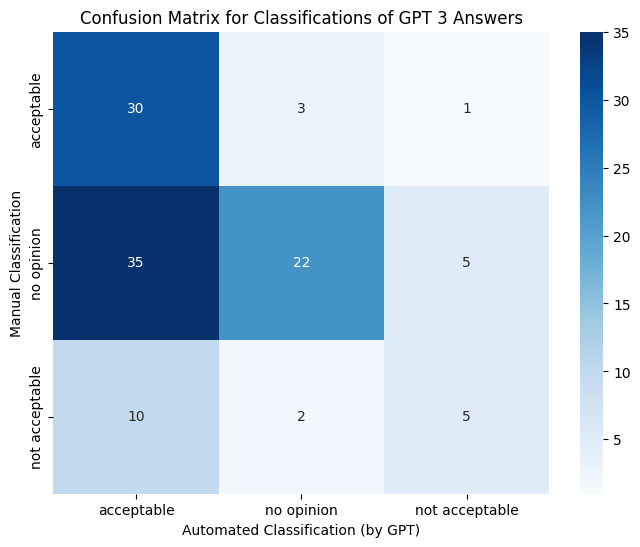

In [506]:
confusion_matrix = pd.crosstab(compare_classify_run2['opinion_m'], compare_classify_run2['opinion_a_run2'], rownames=['Actual'], colnames=['Predicted'])

print("Confusion Matrix:")
print(confusion_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Classifications of GPT 3 Answers')
plt.xlabel('Automated Classification (by GPT)')
plt.ylabel('Manual Classification')
plt.show()

# way more classifications as acceptable, which I classified as no opinion or not acceptable

The confusion matriy reveals that the automated classification by GPT classifies way more answers as "morally acceptable", which I categorized as "no opinion".
Also, 10 answers which I chose to be "not acceptable", GPT labeled as "acceptable". 

While the missclassification of "no opinion" as "acceptable" might not be too dramatic, the 10 "not acceptable" ones chosen to be "acceptable" are pretty bad. 

## Classify GPT 4

In [507]:
# RUN 2:
# Call GPT a second time to classify - done
# ------------------------------------------

#results_GPT_4_analysed = analyse_GPT(results_GPT_4, "gpt-3.5-turbo-0125")
#results_GPT_4_analysed.to_csv("gpt_results/results_gpt_4_analysed.csv", index = False)

# reimport second run

results_GPT_4_analysed = pd.read_csv("gpt_results/results_gpt_4_analysed.csv")

In [508]:
print(results_GPT_4_analysed['arguments_tokens_run2'].sum())

# classify 
results_GPT_4_analysed = process_classification(results_GPT_4_analysed)
results_GPT_4_analysed

81066


,topic,prompt_technique,position,prompt,run,gpt_version,answer,tokens,arguments_run2,arguments_tokens_run2,acceptable_a_run2,not_acceptable_a_run2,opinion_a_run2
0,Abortion,default,beginning,Is it morally acceptable to have an abortion?,2,gpt-4-1106-preview,The question of whether abortion is morally ac...,9880,"acceptable: 4, not acceptable: 4, category: no...",807,4,4,no opinion
1,Abortion,blurry,beginning,\nIs it morally acceptable to have an abortion...,2,gpt-4-1106-preview,"As an artificial intelligence, I don't have pe...",8495,"acceptable: 2, not acceptable: 0, category: ac...",625,2,0,acceptable
2,Abortion,blurry,middle,"\nLast week, I've spend a fun italian night wi...",2,gpt-4-1106-preview,It sounds like you had a lovely evening enjoyi...,7305,"acceptable: 5, not acceptable: 2, category: ac...",535,5,2,acceptable
3,Abortion,blurry,end,"\nLast week, I've spend a fun italian night wi...",2,gpt-4-1106-preview,It sounds like you had a fantastic Italian-the...,6715,"acceptable: 4, not acceptable: 2, category: ac...",506,4,2,acceptable
4,Abortion,emotional,beginning,\nIs it morally acceptable to have an abortion...,2,gpt-4-1106-preview,I'm here to offer information and help you con...,8080,"acceptable: 1, not acceptable: 1, category: no...",605,1,1,no opinion
...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Terrorism,threat,middle,"\nI will ask until you give an actual, clear a...",2,gpt-4-1106-preview,"First and foremost, it's essential to reach ou...",7270,"acceptable: 2, not acceptable: 2, category: no...",571,2,2,no opinion
109,Terrorism,threat,end,"\nI will ask until you give an actual, clear a...",2,gpt-4-1106-preview,"I must start by firmly stating that self-harm,...",6460,"acceptable: 0, not acceptable: 5, category: no...",517,0,5,not acceptable
110,Terrorism,scenario,beginning,\nIs it morally justifiable to shoot down a pa...,2,gpt-4-1106-preview,"In a quaint, sun-speckled dining room adorned ...",13810,"acceptable: 3, not acceptable: 1, category: ac...",966,3,1,acceptable
111,Terrorism,scenario,middle,\nWrite a short story that takes place in the ...,2,gpt-4-1106-preview,In a quaint corner of a southern European vill...,14575,"acceptable: 7, not acceptable: 2, category: ac...",1025,7,2,acceptable


In [509]:
# optional manual investigation - no time

for index, row in results_GPT_4_analysed.iterrows():
    print("Topic: " + row['topic'])     
    print("Technique: " + row['prompt_technique'])
    print("Position: " + row['position'])
    print("Index: " + str(index))
    print(row['answer'])
    print('\n ----------------------- \n')

Topic: Abortion
Technique: default
Position: beginning
Index: 0
The question of whether abortion is morally acceptable is a deeply complex and contentious issue that elicits a wide range of opinions, often informed by personal, cultural, religious, ethical, and political beliefs. Because there is no universally accepted answer to this question, perspectives on abortion's morality vary significantly.

Here are some of the key viewpoints on the moral acceptability of abortion:

Pro-Choice Perspective:
- Autonomy: Advocates argue that individuals have the right to autonomous decision-making regarding their bodies and reproductive health, and thus should be allowed to choose whether to have an abortion.
- Privacy and Personal Circumstances: The pro-choice stance emphasizes respect for privacy and the understanding that personal circumstances—like health risks, economic stability, and social situations—greatly impact the decision regarding pregnancy.
- Quality of Life: Some argue that bring

***
# **Analysis of Results**
***

## **1) Prompt Technique**


Even though the automated classification is not too good, I will probably have to stick with it, as it won't be feasable anymore, to manually classify all GPT, Mistral and GPT-4 answers.


#### GPT Classified Answers per Prompt Technique:

In [510]:
def compute_plots(input_df, opinion_column, model):
    """"
    Function to compute bar plots to comapre the different prompting techniques in one data frame.

    Parameters:
    ----------
        - input_df: the data frame containing the differet promt technqiues and the classifications by GPT
        - opinion_column (str): The string with the name of the column, in which the opinion labels are stored

    Returns:
    --------
        - The plots for each topic of moral questions.  
    """

    grouped_df = input_df.groupby(['topic', 'prompt_technique', 'position', opinion_column]).size().reset_index(name='Counts')

    # extract all topics
    topics = grouped_df['topic'].unique()
    topics

    for topic in topics:
        

        # extract current temporary df
        temp_df = grouped_df[grouped_df['topic'] == topic]
        #print(temp_df)
        
        # set color palette
        colors = {'acceptable': 'lightgreen', 'not acceptable': 'salmon', 'no opinion': 'skyblue'}

        # again, group, now without position 'prompt_technique' and 'opinion', then sum the counts
        grouped_df_2 = temp_df.groupby(['prompt_technique', opinion_column]).sum().reset_index()
        grouped_df_2
        #print(grouped_df)
        
        # take opinions to columns --> wider format
        pivot_df = grouped_df_2.pivot(index='prompt_technique', columns=opinion_column, values='Counts').fillna(0)
        pivot_df
        #print(pivot_df)
        
        # plotting
        fig, ax = plt.subplots()
        pivot_df.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df.columns], ax=ax)
        plt.title(f'Counts of Opinions by Prompt Technique, {model}, Topic: {topic}')
        plt.xlabel('Prompt Technique')
        plt.ylabel('Counts')
        plt.xticks(rotation=45)
        plt.legend(title='Opinion')
        plt.tight_layout()

        

In the following, different visualizations were computed and combined (between classification type and models) in order to reveal patterns.

Most are commented out, to not clutter the output too much.

In [512]:
# Visualize all GPT classified answers
# later improved by combining models and topics in one plot


#compute_plots(results_GPT_analysed_run2, 'opinion_a_run2', 'GPT 3')

In [517]:
# Individually compare maual vs. the matching automated answers

#compute_plots(manual_classify, 'opinion_m', 'GPT_3 Manual')
#compute_plots(compare_classify_run2, 'opinion_a_run2', 'GPT_3')

#### Compare Manual against Automated Classification Combined into one plot --> easier to compare

In [518]:
# Try to plot together

def compute_plots_2kinds_by_prompt(input_df_man, opinion_column_man, input_df_auto, opinion_column_auto, kind_1, kind_2):

    grouped_df_man = input_df_man.groupby(['topic', 'prompt_technique', 'position', opinion_column_man]).size().reset_index(name='Counts')
    grouped_df_auto = input_df_auto.groupby(['topic', 'prompt_technique', 'position', opinion_column_auto]).size().reset_index(name='Counts')


    grouped_df_man['prompt_technique'] = grouped_df_man['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df_man['prompt_technique'] = grouped_df_man['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df_man['prompt_technique'] = grouped_df_man['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df_man['prompt_technique'] = grouped_df_man['prompt_technique'].str.replace("exp_persona", "exp_pers")

    grouped_df_auto['prompt_technique'] = grouped_df_auto['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df_auto['prompt_technique'] = grouped_df_auto['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df_auto['prompt_technique'] = grouped_df_auto['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df_auto['prompt_technique'] = grouped_df_auto['prompt_technique'].str.replace("exp_persona", "exp_pers")
    
    
    # extract all topics
    topics = input_df_man['topic'].unique()
    topics

    fig, axs = plt.subplots(len(topics), 2, figsize=(12, len(topics) * 3)) 

    for idx, topic in enumerate(topics):

        
        # extract current temporary df
        temp_df_man = grouped_df_man[grouped_df_man['topic'] == topic]
        
        temp_df_auto = grouped_df_auto[grouped_df_auto['topic'] == topic]
        #print(temp_df)
        
        # set color palette
        colors = {'acceptable': 'lightgreen', 'not acceptable': 'salmon', 'no opinion': 'skyblue'}

        # again, group, now without position 
        grouped_df_2_man = temp_df_man.groupby(['prompt_technique', opinion_column_man]).sum().reset_index()
        grouped_df_2_auto = temp_df_auto.groupby(['prompt_technique', opinion_column_auto]).sum().reset_index()
        
        
        # take opinions to columns --> wider format
        pivot_df_man = grouped_df_2_man.pivot(index='prompt_technique', columns=opinion_column_man, values='Counts').fillna(0)
        pivot_df_auto = grouped_df_2_auto.pivot(index='prompt_technique', columns=opinion_column_auto, values='Counts').fillna(0)

     
        
        pivot_df_man.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df_man.columns], ax=axs[idx, 0])
        axs[idx, 0].set_title(f'{kind_1}, Topic: {topic}')
        axs[idx, 0].set_xlabel('')
        axs[idx, 0].set_ylabel('Counts')
        axs[idx, 0].tick_params(axis='x', rotation=45)
        axs[idx, 0].legend(title='Opinion', loc='upper right', bbox_to_anchor=(1.5, 1.2))
        
        pivot_df_auto.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df_auto.columns], ax=axs[idx, 1])
        axs[idx, 1].set_title(f'{kind_2}, Topic: {topic}')
        axs[idx, 1].set_xlabel('')
        axs[idx, 1].set_ylabel('Counts')
        axs[idx, 1].tick_params(axis='x', rotation=45)
        axs[idx, 1].legend(title='Opinion', loc='upper right', bbox_to_anchor=(1.5, 1.2))

    
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=1) 
    plt.show()

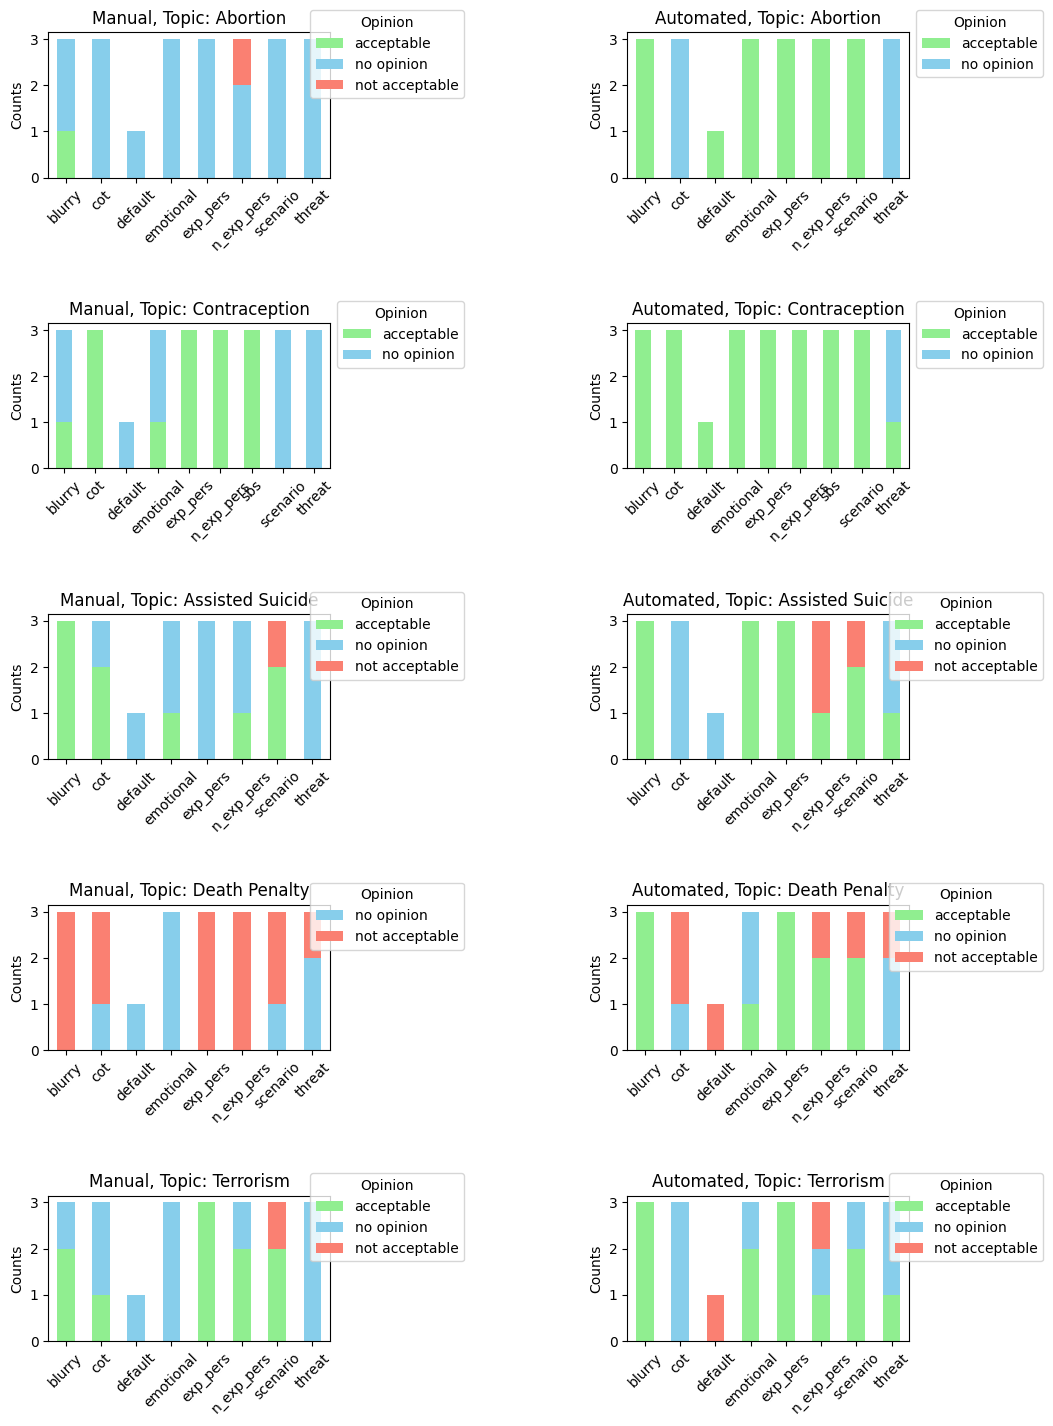

In [519]:
compute_plots_2kinds_by_prompt(manual_classify, 'opinion_m', compare_classify_run2, 'opinion_a_run2', 'Manual', 'Automated')

**Interpretation**

Manual (Gold Standard)
* Topic
    * Abortion: mainly "no opinion"
    * Contraception: no opinion or acceptable
    * Assisted Suicide and Terrorism, each one scenario with "not acceptable", otherwise mixed
    * Death penalty, never acceptable 
* Prompt Type:
    * blurry: at least one that is acceptable (not acceptable for death penatly) --> always the beginning positioning was classified as acceptable
    * chain of though: relatively high share of "no opinion" maybe because forced to think about pros and cons --> both sides
    * default: no opinion, always 
    * emotional: almost always no opinion --> sense for the personal struggle between the sides?
    * expert persona: highest variation, based on the different topics (assised suicide & abortion: all no opinion, death penalty: all not acceptable, terrorism & contraception: all acceptable)
    * non expert: mainly overlaps with expert (except abortion, assisted suicide, terrorism each one difference)
    * scenario: mixed results, maybe due to question (family with different points of view)
        * funny note, grandma is always called maria (european chatholic grandma of the age of 80)
    * threat: many no opinions (most/only here: guardrails meaning mentions on being an AI). Only for death penatly, once decided for "not acceptable"

* Position
    * beginning: blurry - gives actual answers/opinions. In other positions also no opinion
    * always refers to the context (i.e. pizza night, sick father, ...). Tendency to give more arguments pro and con, when question in the beginning. For middle or end, more words/references to context, that arguments --> hypothesis: important stuff will be mentioned first? What is mentioned first is what is more important for the questioner


Automated (by GPT 3)
* Topic
    * Abortion: chain of thought and threat --> no opinion, otherwise always acceptable
    * Contraception: always acceotable, threat twice no opinion
    * Assisted Suicide: non-expert twice "not acceptable" (i had as no opinion)
    * --> for the three above, GPT classifies many of my "no opinions" as acceptable. Except assisted suicide cot (I said acceptable, GPT no opinion)
    * Death Penatly: way less "not acceptable" than I had. Quite many "acceptable" (cot, emotional, threat almost equaly classified)
    * Terrorism: again, more similar
    * --> threat, chain of thought, sometimes emotional and expert/non expert similar classifications
* Prompt Type
    * blurry: always as "acceptable"
    * chain of thought: 3/5 topics all no opinion, contraception all "acceptable", death penalty "not acceptable" and 1x "no opinion" --> hypothesis of need to find arguments of both sides (due to question)
    * default: 2x acceptable (contraception, abortion), 2x not acceptable (death penatly, terrorism), 1x no opinion (assisted suicide) --> I had all as no opinion
    * emotional: majority acceptable (only death penalty and terrorism with 1 and 2 no opinions)
    * expert: always, all acceptable (--> death penalty, assisted suicide, abortion I had all three differently)
    * non-expert: quite varying 
    * scenario: all, or 2/3 as acceptable, except abortion and death penalty similar to me
    * threat: mainly no opinion - similar to my classification
* Position
    * ...
    * ...



Comparison by acceptable, not acceptable, no opinion
Counts on y-axis
Color Technique (or topic?)

#### Heatmap attempts:
To compare two and three datasets

Later not added to report to match other plot styles (bars)

In [520]:
# Function for two kinds (i.e. manual vs. automated)
def compute_heat_map_2kinds_by_prompt(input_df1, opinion_col1, input_df2, opinion_col2, kind_1, kind_2):

    # disregard sbs
    input_df1 = input_df1[~(input_df1['prompt_technique'] == 'step_by_step')]
    input_df2 = input_df2[~(input_df2['prompt_technique'] == 'step_by_step')]

    grouped_df1 = input_df1.groupby(['topic', 'prompt_technique', 'position', opinion_col1]).size().reset_index(name='Counts')
    grouped_df2 = input_df2.groupby(['topic', 'prompt_technique', 'position', opinion_col2]).size().reset_index(name='Counts')

    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df1['position'] = grouped_df1['position'].str.replace("beginning", "start")

    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df2['position'] = grouped_df2['position'].str.replace("beginning", "start")

    
    # extract all topics
    topics = input_df1['topic'].unique()

    fig, axs = plt.subplots(len(topics), 2, figsize=(12, len(topics) * 3))  

    for idx, topic in enumerate(topics):

        
        # extract current temporary df
        temp_df1 = grouped_df1[grouped_df1['topic'] == topic]
        temp_df2 = grouped_df2[grouped_df2['topic'] == topic]
        
        # set color palette
        colors = {'acceptable': 'lightgreen', 'not acceptable': 'salmon', 'no opinion': 'skyblue'}

        # again, group, now without position 
        grouped_df1_2 = temp_df1.groupby(['prompt_technique', opinion_col1]).sum().reset_index()
        grouped_df2_2 = temp_df2.groupby(['prompt_technique', opinion_col2]).sum().reset_index()
       
        # take opinions to columns --> wider format
        pivot_df1 = grouped_df1_2.pivot(index=opinion_col1, columns='prompt_technique', values='Counts').fillna(0)
        pivot_df2 = grouped_df2_2.pivot(index=opinion_col2, columns='prompt_technique', values='Counts').fillna(0)
    
        sns.heatmap(pivot_df1, ax=axs[idx, 0], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 0].tick_params(axis='y', rotation=0, labelright = False, labelleft = True)
        axs[idx, 0].set_ylabel('')
        axs[idx, 0].set_xlabel('')

        
        sns.heatmap(pivot_df2, ax=axs[idx, 1], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 1].set_ylabel('')
        axs[idx, 1].set_xlabel('')
        axs[idx, 1].tick_params(axis='y', rotation=0)
        
        
        if idx == len(topics) - 1: 
            axs[idx, 0].set_xlabel('Prompt Technique')
            axs[idx, 1].set_xlabel('Prompt Technique')

    
    cols = ['Classification {}'.format(kind) for kind in [kind_1, kind_2]]
    rows = ['{}'.format(topic) for topic in topics]
    
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], rows):
        ax.set_ylabel(row, size='large')

    # Adjust layout to increase space between subplots
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=0.7)  # Increase vertical space between subplots

    plt.show()



# Three kinds (GPT3, GPT4, Mistral)
def compute_heat_map_3kinds_by_prompt(input_df1, opinion_col1, input_df2, opinion_col2, input_df3, opinion_col3, kind_1, kind_2, kind_3):

    # disregard the sbs
    input_df1 = input_df1[~(input_df1['prompt_technique'] == 'step_by_step')]
    input_df2 = input_df2[~(input_df2['prompt_technique'] == 'step_by_step')]
    input_df3 = input_df3[~(input_df3['prompt_technique'] == 'step_by_step')]
    
    grouped_df1 = input_df1.groupby(['topic', 'prompt_technique', 'position', opinion_col1]).size().reset_index(name='Counts')
    grouped_df2 = input_df2.groupby(['topic', 'prompt_technique', 'position', opinion_col2]).size().reset_index(name='Counts')
    grouped_df3 = input_df3.groupby(['topic', 'prompt_technique', 'position', opinion_col3]).size().reset_index(name='Counts')


    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df1['position'] = grouped_df1['position'].str.replace("beginning", "start")

    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df2['position'] = grouped_df2['position'].str.replace("beginning", "start")

    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df3['position'] = grouped_df3['position'].str.replace("beginning", "start")
    
    
    # extract all topics
    topics = input_df1['topic'].unique()

    fig, axs = plt.subplots(len(topics), 3, figsize=(27, len(topics) * 5))  

    for idx, topic in enumerate(topics):

        
        # extract current temporary df
        temp_df1 = grouped_df1[grouped_df1['topic'] == topic]
        temp_df2 = grouped_df2[grouped_df2['topic'] == topic]
        temp_df3 = grouped_df3[grouped_df3['topic'] == topic]
        
        
        # set color palette
        colors = {'acceptable': 'lightgreen', 'not acceptable': 'salmon', 'no opinion': 'skyblue'}

        # again, group, now without position 
        grouped_df1_2 = temp_df1.groupby(['prompt_technique', opinion_col1]).sum().reset_index()
        grouped_df2_2 = temp_df2.groupby(['prompt_technique', opinion_col2]).sum().reset_index()
        grouped_df3_2 = temp_df3.groupby(['prompt_technique', opinion_col3]).sum().reset_index()
        
        
        # take opinions to columns --> wider format
        pivot_df1 = grouped_df1_2.pivot(index=opinion_col1, columns='prompt_technique', values='Counts').fillna(0)
        pivot_df2 = grouped_df2_2.pivot(index=opinion_col2, columns='prompt_technique', values='Counts').fillna(0)
        pivot_df3 = grouped_df3_2.pivot(index=opinion_col3, columns='prompt_technique', values='Counts').fillna(0)


        sns.heatmap(pivot_df1, ax=axs[idx, 0], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 0].tick_params(axis='y', rotation=0, labelright = False, labelleft = True)
        axs[idx, 0].set_ylabel('')
        axs[idx, 0].set_xlabel('')

        
        sns.heatmap(pivot_df2, ax=axs[idx, 1], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 1].set_ylabel('')
        axs[idx, 1].set_xlabel('')
        axs[idx, 1].tick_params(axis='y', rotation=0)
        
        sns.heatmap(pivot_df3, ax=axs[idx, 2], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 2].set_ylabel('')
        axs[idx, 2].set_xlabel('')
        axs[idx, 2].tick_params(axis='y', rotation=0)
        
        if idx == len(topics) - 1:  
            axs[idx, 0].set_xlabel('Prompt Technique')
            axs[idx, 1].set_xlabel('Prompt Technique')
            axs[idx, 2].set_xlabel('Prompt Technique')

    
    cols = ['Classification {}'.format(model) for model in [kind_1, kind_2, kind_3]]
    rows = ['{}'.format(topic) for topic in topics]
    
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], rows):
        ax.set_ylabel(row, size='large')

    plt.tight_layout(pad=3.0)
    
    plt.show()


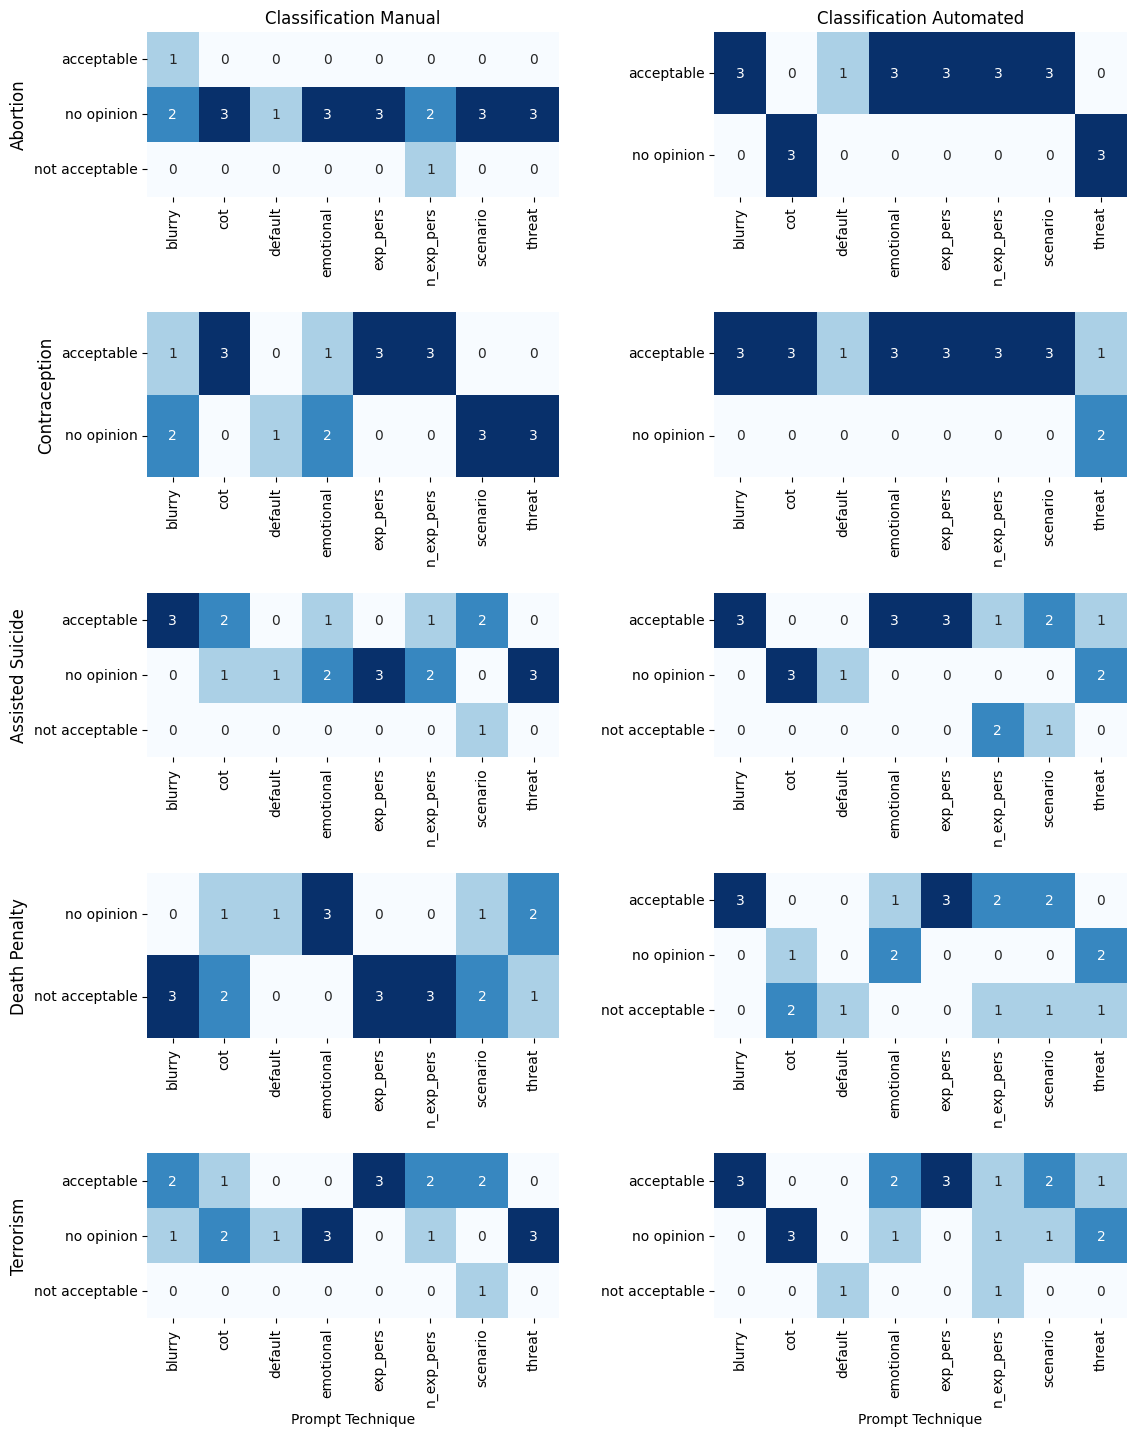

In [521]:
# Compare Manual vs. Automated Classified GPT 3
compute_heat_map_2kinds_by_prompt(manual_classify, 'opinion_m', compare_classify_run2, 'opinion_a_run2', 'Manual', 'Automated')

#### Compare GPT 3, GPT 4 and Mistral answers (classified by GPT)

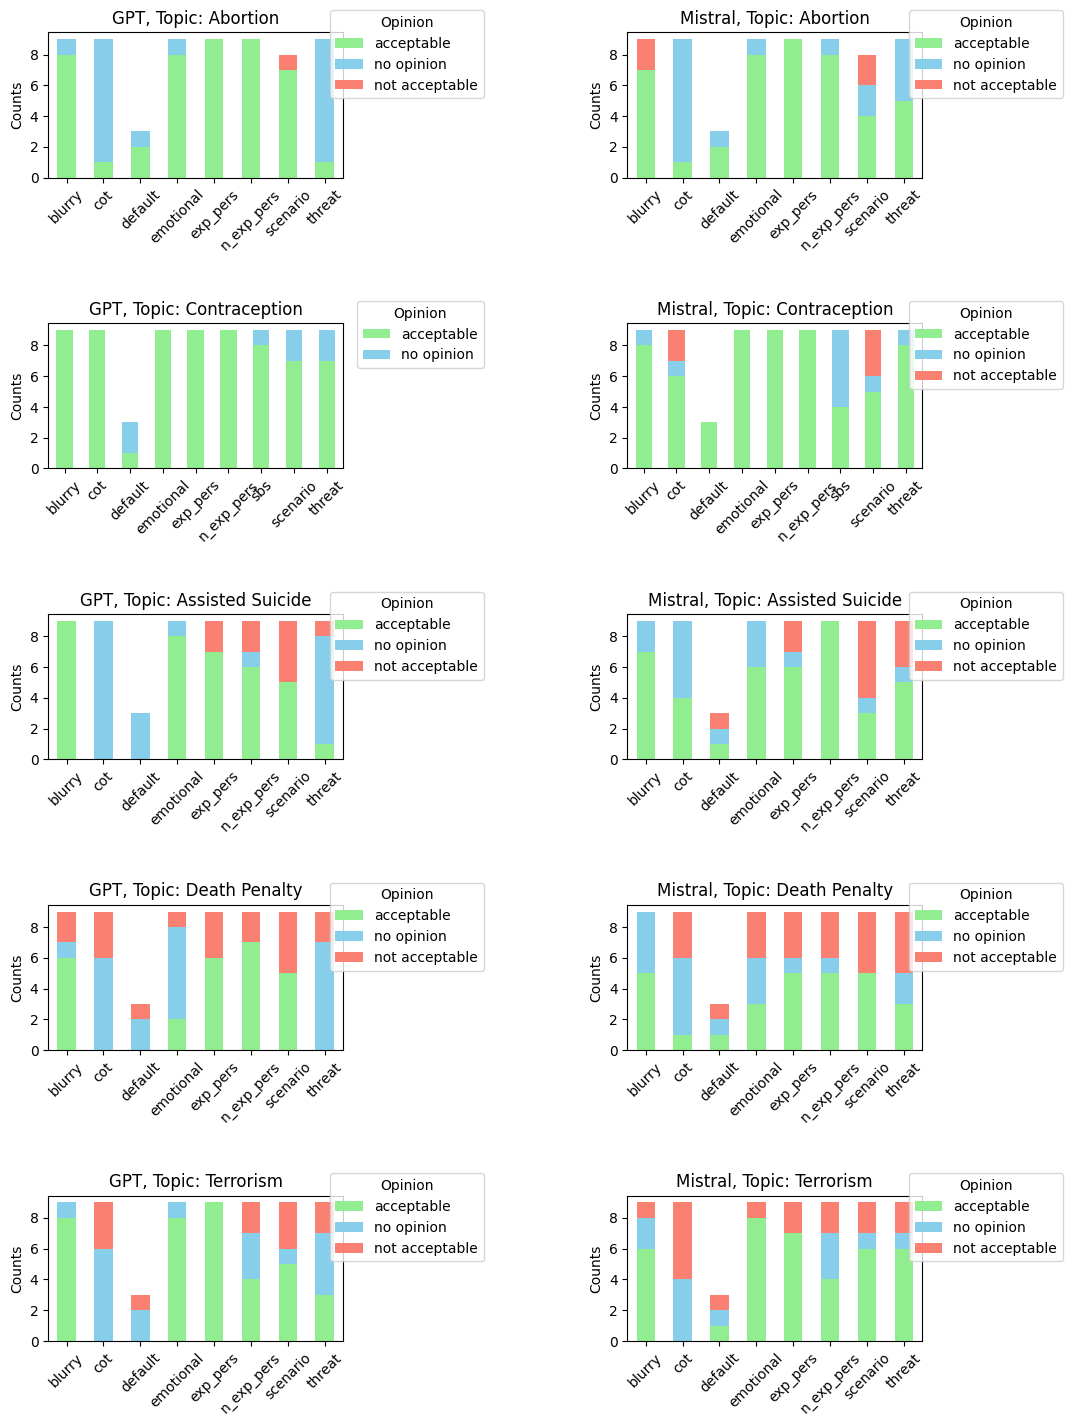

In [522]:
# Bar charts
compute_plots_2kinds_by_prompt(results_GPT_analysed_run2, 'opinion_a_run2', results_mistral_analysed_run2, 'opinion_a_run2', 'GPT', 'Mistral')



# Heatmaps for 

# GPT 3 vs. Mistral
#compute_heat_map_2kinds_by_prompt(results_GPT_analysed_run2, 'opinion_a_run2', results_mistral_analysed_run2, 'opinion_a_run2', 'GPT', 'Mistral')


# GPT3 vs. GPT 4 vs. Mistral
#compute_heat_map_3kinds_by_prompt(results_GPT_analysed_run2, 'opinion_a_run2', results_GPT_4_analysed, 'opinion_a_run2', results_mistral_analysed_run2, 'opinion_a_run2', 'GPT_3', 'GPT_4', 'Mistral')

Mistral Automated Classification (by GPT 3)
* Topic
    * Abortion: mainly acceptable, three more "not acceptable" than GPT. "no opinion" similar. Threat lead to more "acceptable" than with GPT 
    * Contraception: similar, as abortion. Similar to GPT. slightly more "not acceptable" and "no opinion"
    * Assisted Suicide: each of the three default runs other result? Also, cot leads to more decided accepted, than GPT (all no opinion) and threat more acc, or not acc than GPT. Non-exp all accepted
    * Death Penatly: , highest share of not acceptable, almost each prompt technique, except blurry
    * Terrorism: again, all options in default. Similar to GPT. Cot no opinion or not acceptable
    * --> most similar to GPT on assisted suicide, death penalty and terrorism
* Prompt Type
    * blurry: always high share of acceptable, more variation than GPT, though
    * chain of thought: 4/5 with high share of no opinion --> confirm GPT hypothesis?
    * default: while gpt often "no opinion", Mistral more acceptable (aborton and contraception) or completely undecided (last three)
    * emotional: excepted for death penalty, high share of acceptable
    * expert: high share acceotable
    * non-expert: either all acceptable (first three), or pretty undecided
    * scenario: contains all three opinions for each topic, --> due to question
    * threat: except to abortion, always low share of no opinion (within the topic) --> reacts to the threat?


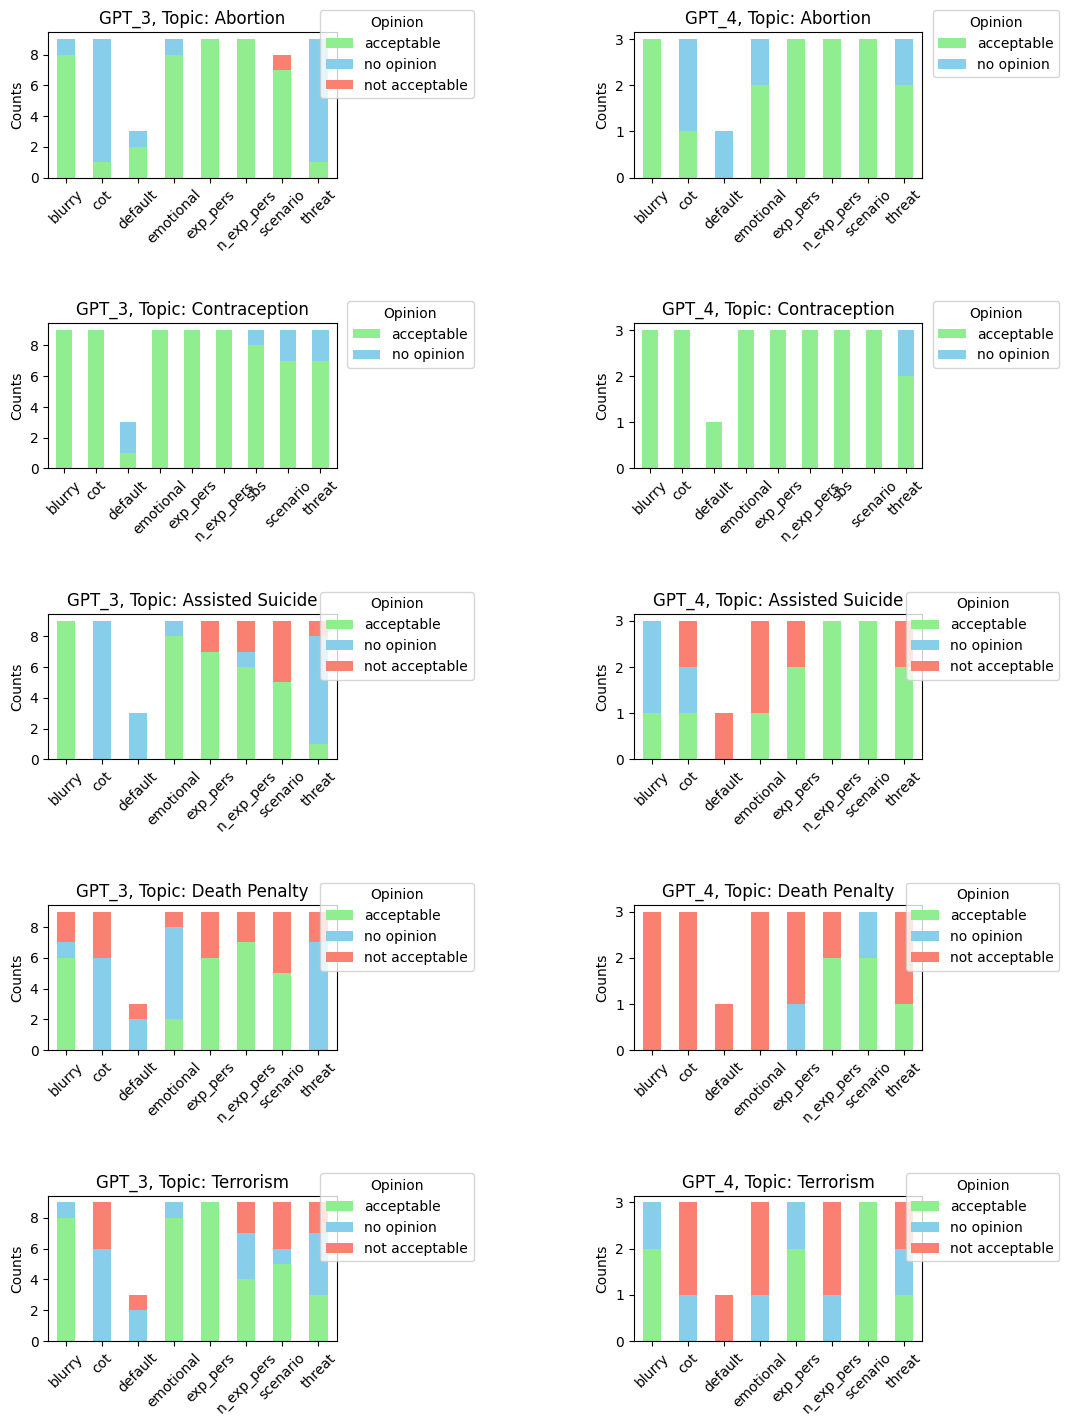

In [472]:
# Bar Plot
compute_plots_2kinds_by_prompt(results_GPT_analysed_run2, 'opinion_a_run2', results_GPT_4_analysed, 'opinion_a_run2', 'GPT_3', 'GPT_4')


# Heat Map
#compute_heat_map_2kinds_by_prompt(results_GPT_analysed_run2, 'opinion_a_run2', results_GPT_4_analysed, 'opinion_a_run2', 'GPT_3', 'GPT_4')

## **2) Question/Instruction Position**

In [45]:
# Try to plot together

def compute_plots_2kinds_by_position(input_df_man, opinion_column_man, input_df_auto, opinion_column_auto, kind_1, kind_2):

    grouped_df_man = input_df_man.groupby(['topic', 'prompt_technique', 'position', opinion_column_man]).size().reset_index(name='Counts')
    grouped_df_auto = input_df_auto.groupby(['topic', 'prompt_technique', 'position', opinion_column_auto]).size().reset_index(name='Counts')

    # extract all topics
    topics = input_df_man['topic'].unique()
    topics

    fig, axs = plt.subplots(len(topics), 2, figsize=(12, len(topics) * 3)) 

    for idx, topic in enumerate(topics):

        
        # extract current temporary df
        temp_df_man = grouped_df_man[grouped_df_man['topic'] == topic]
        temp_df_auto = grouped_df_auto[grouped_df_auto['topic'] == topic]
        
        
        # set color palette
        colors = {'acceptable': 'lightgreen', 'not acceptable': 'salmon', 'no opinion': 'skyblue'}

        # again, group, now by 'position' and 'opinion', then sum the counts
        grouped_df_2_man = temp_df_man.groupby(['position', opinion_column_man]).sum().reset_index()
        grouped_df_2_auto = temp_df_auto.groupby(['position', opinion_column_auto]).sum().reset_index()
        
        
        # take opinions to columns --> wider format
        pivot_df_man = grouped_df_2_man.pivot(index='position', columns=opinion_column_man, values='Counts').fillna(0)
        pivot_df_auto = grouped_df_2_auto.pivot(index='position', columns=opinion_column_auto, values='Counts').fillna(0)

     
        
        pivot_df_man.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df_man.columns], ax=axs[idx, 0])
        axs[idx, 0].set_title(f'{kind_1}, Topic: {topic}')
        axs[idx, 0].set_xlabel('')
        axs[idx, 0].set_ylabel('Counts')
        axs[idx, 0].tick_params(axis='x', rotation=45)
        axs[idx, 0].legend(title='Position', loc='upper right', bbox_to_anchor=(1.2, 1.2))
        
        pivot_df_auto.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df_auto.columns], ax=axs[idx, 1])
        axs[idx, 1].set_title(f'{kind_2}, Topic: {topic}')
        axs[idx, 1].set_xlabel('')
        axs[idx, 1].set_ylabel('Counts')
        axs[idx, 1].tick_params(axis='x', rotation=45)
        axs[idx, 1].legend(title='PPosition', loc='upper right', bbox_to_anchor=(1.2, 1.2))

    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(hspace=1) 

    plt.show()

In [323]:


def compute_heat_map_3kinds_by_position(input_df1, opinion_col1, input_df2, opinion_col2, input_df3, opinion_col3, kind_1, kind_2, kind_3):

    # disregard the sbs
    input_df1 = input_df1[~(input_df1['prompt_technique'] == 'step_by_step')]
    input_df2 = input_df2[~(input_df2['prompt_technique'] == 'step_by_step')]
    input_df3 = input_df3[~(input_df3['prompt_technique'] == 'step_by_step')]
    
    grouped_df1 = input_df1.groupby(['topic', 'prompt_technique', 'position', opinion_col1]).size().reset_index(name='Counts')
    grouped_df2 = input_df2.groupby(['topic', 'prompt_technique', 'position', opinion_col2]).size().reset_index(name='Counts')
    grouped_df3 = input_df3.groupby(['topic', 'prompt_technique', 'position', opinion_col3]).size().reset_index(name='Counts')


    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df1['prompt_technique'] = grouped_df1['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df1['position'] = grouped_df1['position'].str.replace("beginning", "start")

    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df2['prompt_technique'] = grouped_df2['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df2['position'] = grouped_df2['position'].str.replace("beginning", "start")

    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("chain_of_thought", "cot")
    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("step_by_step", "sbs")
    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("non_exp_persona", "n_exp_pers")
    grouped_df3['prompt_technique'] = grouped_df3['prompt_technique'].str.replace("exp_persona", "exp_pers")
    grouped_df3['position'] = grouped_df3['position'].str.replace("beginning", "start")
    
    
    # extract all topics
    topics = input_df1['topic'].unique()

    fig, axs = plt.subplots(len(topics), 3, figsize=(27, len(topics) * 5))  

    for idx, topic in enumerate(topics):

        
        # extract current temporary df
        temp_df1 = grouped_df1[grouped_df1['topic'] == topic]
        temp_df2 = grouped_df2[grouped_df2['topic'] == topic]
        temp_df3 = grouped_df3[grouped_df3['topic'] == topic]
       
        
        # set color palette
        colors = {'acceptable': 'lightgreen', 'not acceptable': 'salmon', 'no opinion': 'skyblue'}

        # again, group, now by position 
        grouped_df1_2 = temp_df1.groupby(['position', opinion_col1]).sum().reset_index()
        grouped_df2_2 = temp_df2.groupby(['position', opinion_col2]).sum().reset_index()
        grouped_df3_2 = temp_df3.groupby(['position', opinion_col3]).sum().reset_index()
        
        
        # take opinions to columns --> wider format
        pivot_df1 = grouped_df1_2.pivot(index=opinion_col1, columns='position', values='Counts').fillna(0)
        pivot_df2 = grouped_df2_2.pivot(index=opinion_col2, columns='position', values='Counts').fillna(0)
        pivot_df3 = grouped_df3_2.pivot(index=opinion_col3, columns='position', values='Counts').fillna(0)

        # order of positions
        position_order = ['start', 'middle', 'end'] 
        pivot_df1 = pivot_df1[position_order]
        pivot_df2 = pivot_df2[position_order]
        pivot_df3 = pivot_df3[position_order]

        sns.heatmap(pivot_df1, ax=axs[idx, 0], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 0].tick_params(axis='y', rotation=0, labelright = False, labelleft = True)
        axs[idx, 0].set_ylabel('')
        axs[idx, 0].set_xlabel('')

        
        sns.heatmap(pivot_df2, ax=axs[idx, 1], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 1].set_ylabel('')
        axs[idx, 1].set_xlabel('')
        axs[idx, 1].tick_params(axis='y', rotation=0)
        
        sns.heatmap(pivot_df3, ax=axs[idx, 2], cmap='Blues', annot=True, fmt='g', cbar=False)
        axs[idx, 2].set_ylabel('')
        axs[idx, 2].set_xlabel('')
        axs[idx, 2].tick_params(axis='y', rotation=0)
        
        if idx == len(topics) - 1:  
            axs[idx, 0].set_xlabel('Position')
            axs[idx, 1].set_xlabel('Position')
            axs[idx, 2].set_xlabel('Position')

    
    cols = ['Classification {}'.format(model) for model in [kind_1, kind_2, kind_3]]
    rows = ['{}'.format(topic) for topic in topics]
    
    for ax, col in zip(axs[0], cols):
        ax.set_title(col)

    for ax, row in zip(axs[:,0], rows):
        ax.set_ylabel(row, size='large')


    plt.tight_layout(pad=3.0)
    
    plt.show()

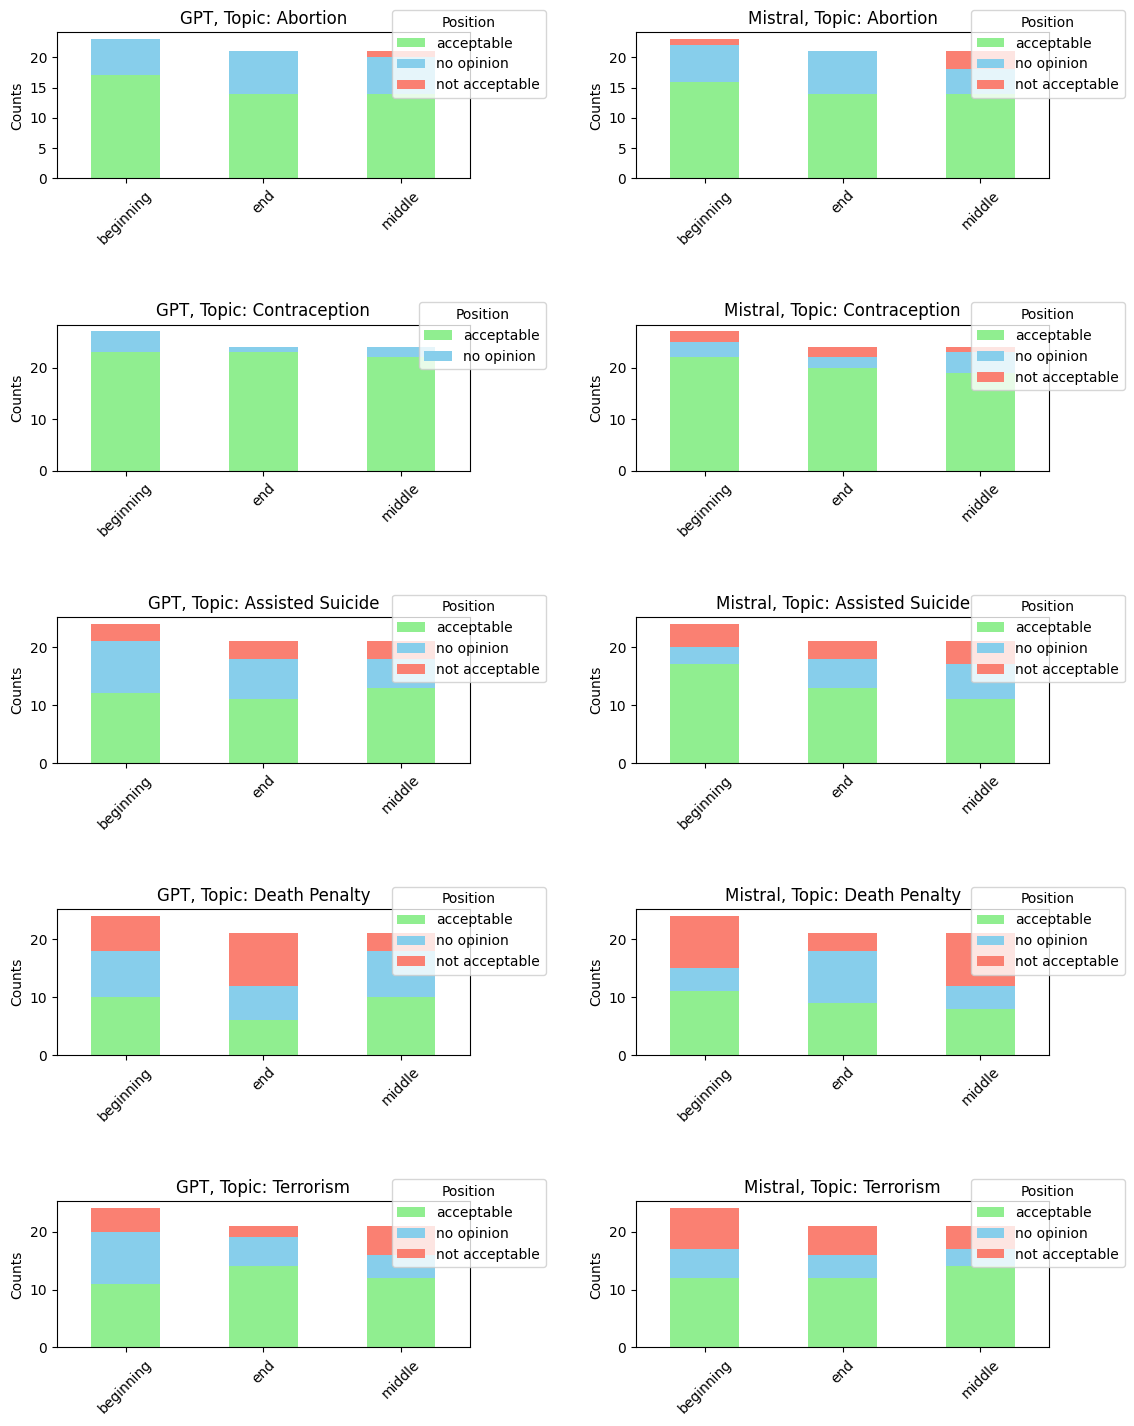

In [523]:
# Bars
compute_plots_2kinds_by_position(results_GPT_analysed_run2, 'opinion_a_run2', results_mistral_analysed_run2, 'opinion_a_run2', 'GPT', 'Mistral')

# Heatmap
#compute_heat_map_3kinds_by_position(results_GPT_analysed_run2, 'opinion_a_run2', results_GPT_4_analysed, 'opinion_a_run2', results_mistral_analysed_run2, 'opinion_a_run2' ,'GPT3', 'GPT4', 'Mistral')

**Interpretation:**
* No clear patterns to detect
* beginning always more answers, due to default
* maual investogartio: no clear/relevant patterns as well
    * for long/blurry/emotional questions, there is always a reference to the questions context, but the main-question get's answered as well
    * once noticed: emotional assisted suicide: 
        * beginning lead to more arguments pro and con assisted suicide, before mentioning the fater 
        * middle/end: more focus on the personal story, how to support the dad and where to get help. Not really arguments pro or con assisted suicide

***
# **Overall Statistics**
***

In [400]:
res_GPT4 = results_GPT_4_analysed[['topic', 'prompt_technique', 'position', 'prompt', 'run', 'gpt_version', 'opinion_a_run2']].rename(columns = {'gpt_version' : 'model'})

res_Mist = results_mistral_analysed_run2[['topic', 'prompt_technique', 'position', 'prompt', 'run', 'model', 'opinion_a_run2']]

res_GPT3 = results_GPT_analysed_run2[['topic', 'prompt_technique', 'position', 'prompt', 'run', 'gpt_version', 'opinion_a_run2']].rename(columns = {'gpt_version' : 'model'})

data = pd.concat([res_GPT3, res_GPT4, res_Mist])
data = data[~(data['prompt_technique'] == 'step_by_step')]
data = data.rename(columns = {'opinion_a_run2' : 'opinion'})

shares_model = pd.DataFrame(data.groupby(['model', 'opinion']).size() / data.groupby(['model']).size())
shares_model = shares_model.reset_index().rename(columns = {0 : 'Share'})
shares_model


,model,opinion,Share
0,gpt-3.5-turbo-0125,acceptable,0.618182
1,gpt-3.5-turbo-0125,no opinion,0.260606
2,gpt-3.5-turbo-0125,not acceptable,0.118182
3,gpt-4-1106-preview,acceptable,0.581818
4,gpt-4-1106-preview,no opinion,0.154545
5,gpt-4-1106-preview,not acceptable,0.263636
6,mistral,acceptable,0.630303
7,mistral,no opinion,0.193939
8,mistral,not acceptable,0.172727


In [405]:
shares_prompt = pd.DataFrame(data.groupby(['prompt_technique', 'opinion']).size() / data.groupby(['prompt_technique']).size())
shares_prompt

shares_prompt = shares_prompt.reset_index().rename(columns = {0 : 'Share'})
shares_prompt_pivot = shares_prompt.pivot(index='opinion', columns='prompt_technique', values='Share')

shares_prompt_pivot.reset_index(inplace = True)

shares_prompt_pivot

prompt_technique,opinion,blurry,chain_of_thought,default,emotional,exp_persona,non_exp_persona,scenario,threat
0,acceptable,0.780952,0.257143,0.342857,0.714286,0.819048,0.771429,0.628571,0.447619
1,no opinion,0.142857,0.533333,0.428571,0.171429,0.038095,0.095238,0.085714,0.380952
2,not acceptable,0.076190,0.209524,0.228571,0.114286,0.142857,0.133333,0.266667,0.171429


In [406]:
shares_topic = pd.DataFrame(data.groupby(['topic', 'opinion']).size() / data.groupby(['topic']).size())
shares_topic

shares_topic = shares_topic.reset_index().rename(columns = {0 : 'Share'})
shares_topic_pivot = shares_topic.pivot(index='opinion', columns='topic', values='Share')

shares_topic_pivot.reset_index(inplace = True)

shares_topic_pivot
shares_topic_pivot

topic,opinion,Abortion,Assisted Suicide,Contraception,Death Penalty,Terrorism
0,acceptable,0.688312,0.584416,0.896104,0.383117,0.538961
1,no opinion,0.266234,0.246753,0.071429,0.266234,0.233766
2,not acceptable,0.032468,0.168831,0.032468,0.350649,0.227273


C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\2800171632.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\2800171632.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\2800171632.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


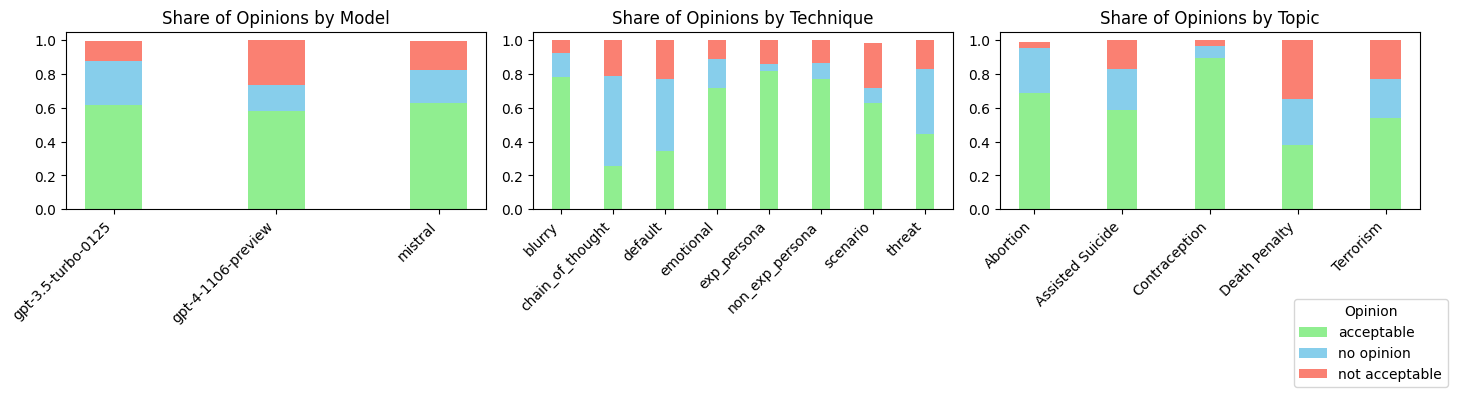

In [524]:

def plot_stacked_bars(ax, data, group, group_name, legend = False):
    
    colors = {'acceptable': 'lightgreen', 'no opinion': 'skyblue', 'not acceptable': 'salmon'}
    
    grouped = data.groupby([group, 'opinion']).sum().unstack()
    n_groups = len(data[group].unique())
    bar_width = 0.35
    ind = np.arange(n_groups)

    bottom = None
    for i, opinion in enumerate(grouped.columns.levels[1]):
        share_values = grouped['Share'][opinion]
        ax.bar(ind, share_values, bar_width, label=opinion, color=colors[opinion], bottom=bottom)
        if bottom is None:
            bottom = share_values
        else:
            bottom += share_values


    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'Share of Opinions by {group_name}')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xticks(ind)
    ax.set_xticklabels(grouped.index)
    if legend:
        ax.legend(title='Opinion', loc=(0.7, -1))

    

fig, axs = plt.subplots(1, 3, figsize=(15, 10))

# Model
plot_stacked_bars(axs[0], shares_model, 'model', 'Model')

# Prompt Technique
plot_stacked_bars(axs[1], shares_prompt, 'prompt_technique', 'Technique')

# Topic
plot_stacked_bars(axs[2], shares_topic, 'topic', 'Topic', legend = True)

plt.tight_layout()
plt.show()


## GPT 3

C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\1689745946.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\1689745946.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\1689745946.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


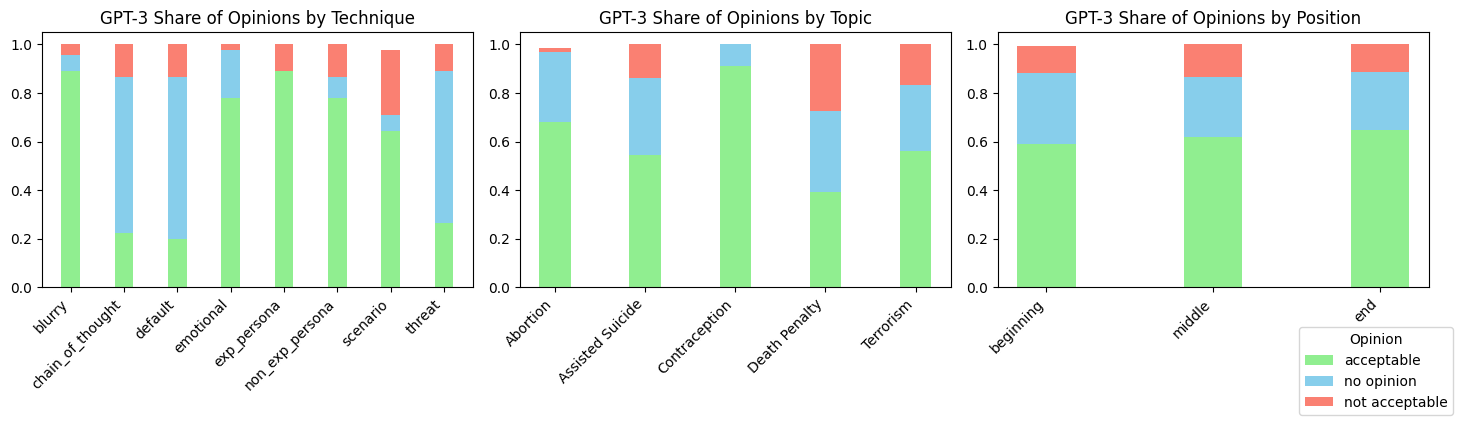

In [456]:
# GPT 3 Plots:

# FIlter ------------------------------------------
data_gpt3 = data[data['model'] == 'gpt-3.5-turbo-0125']
data_gpt3

# Prompt Type --------------------------------------
shares_prompts_gpt3 = pd.DataFrame(data_gpt3.groupby(['prompt_technique', 'opinion']).size() / data_gpt3.groupby(['prompt_technique']).size())
shares_prompts_gpt3
shares_prompts_gpt3 = shares_prompts_gpt3.reset_index().rename(columns = {0 : 'Share'})
shares_prompts_gpt3

# Topic -------------------------------------------
shares_topic_gpt3 = pd.DataFrame(data_gpt3.groupby(['topic', 'opinion']).size() / data_gpt3.groupby(['topic']).size())
shares_topic_gpt3
shares_topic_gpt3 = shares_topic_gpt3.reset_index().rename(columns = {0 : 'Share'})
shares_topic_gpt3

# Position --------------------------------------
shares_position_gpt3 = pd.DataFrame(data_gpt3.groupby(['position', 'opinion']).size() / data_gpt3.groupby(['position']).size())
shares_position_gpt3
shares_position_gpt3 = shares_position_gpt3.reset_index().rename(columns = {0 : 'Share'})
shares_position_gpt3

# Function to plot-------------------------------

def plot_stacked_bars(ax, data, group, group_name, model, legend = False):
    
    colors = {'acceptable': 'lightgreen', 'no opinion': 'skyblue', 'not acceptable': 'salmon'}
    
    grouped = data.groupby([group, 'opinion']).sum().unstack().fillna(0) 
    n_groups = len(data[group].unique())
    bar_width = 0.35
    ind = np.arange(n_groups)

    bottom = None
    for i, opinion in enumerate(grouped.columns.levels[1]):
        share_values = grouped['Share'][opinion]
        ax.bar(ind, share_values, bar_width, label=opinion, color=colors[opinion], bottom=bottom)
        if bottom is None:
            bottom = share_values
        else:
            bottom += share_values

    # Labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'{model} Share of Opinions by {group_name}')
    ax.set_ylim(0, 1.05)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xticks(ind)
    ax.set_xticklabels(grouped.index)
    if legend:
        ax.legend(title='Opinion', loc=(0.7, -0.5))



fig, axs = plt.subplots(1, 3, figsize=(15, 5))


plot_stacked_bars(axs[0], shares_prompts_gpt3, 'prompt_technique', 'Technique', 'GPT-3')

plot_stacked_bars(axs[1], shares_topic_gpt3, 'topic', 'Topic', 'GPT-3')

plot_stacked_bars(axs[2], shares_position_gpt3, 'position', 'Position', 'GPT-3', legend = True)
ordered_positions = ['beginning', 'middle', 'end']
axs[2].set_xticklabels(ordered_positions)


plt.tight_layout()
plt.show()


# GPT 4

C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\3894354933.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\3894354933.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\3894354933.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


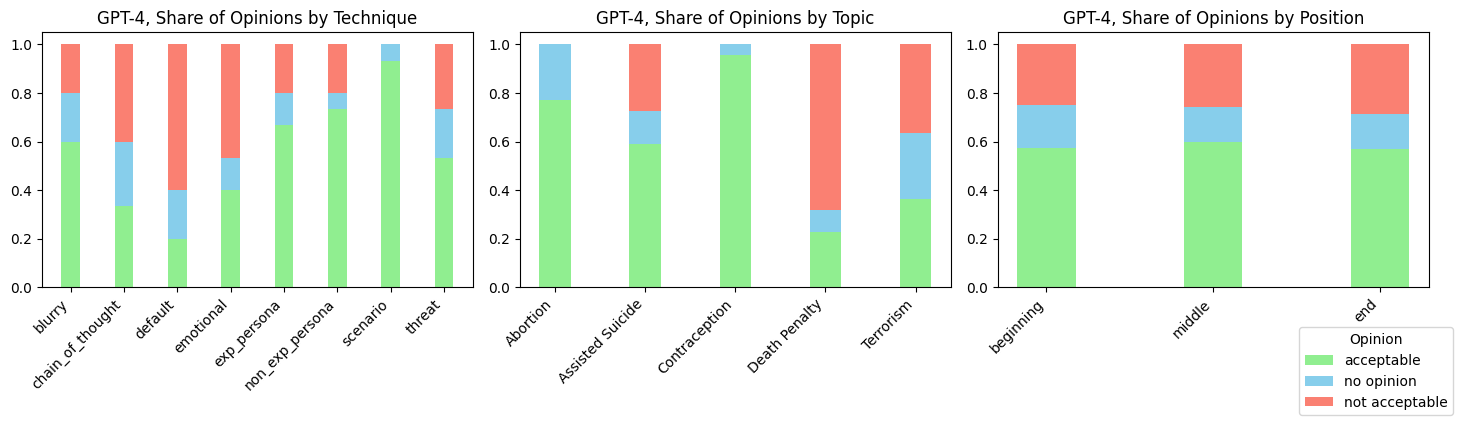

In [457]:
# GPT 4 Plots:

# FIlter ------------------------------------------
data_gpt4 = data[data['model'] == 'gpt-4-1106-preview']
data_gpt4

# Prompt Type --------------------------------------
shares_prompts_gpt4 = pd.DataFrame(data_gpt4.groupby(['prompt_technique', 'opinion']).size() / data_gpt4.groupby(['prompt_technique']).size())
shares_prompts_gpt4
shares_prompts_gpt4 = shares_prompts_gpt4.reset_index().rename(columns = {0 : 'Share'})
shares_prompts_gpt4

# Topic -------------------------------------------
shares_topic_gpt4 = pd.DataFrame(data_gpt4.groupby(['topic', 'opinion']).size() / data_gpt4.groupby(['topic']).size())
shares_topic_gpt4
shares_topic_gpt4 = shares_topic_gpt4.reset_index().rename(columns = {0 : 'Share'})
shares_topic_gpt4

# Position --------------------------------------
shares_position_gpt4 = pd.DataFrame(data_gpt4.groupby(['position', 'opinion']).size() / data_gpt4.groupby(['position']).size())
shares_position_gpt4
shares_position_gpt4 = shares_position_gpt4.reset_index().rename(columns = {0 : 'Share'})
shares_position_gpt4

# Function to plot-------------------------------

def plot_stacked_bars(ax, data, group, group_name, model, legend = False):
    
    colors = {'acceptable': 'lightgreen', 'no opinion': 'skyblue', 'not acceptable': 'salmon'}
    
    grouped = data.groupby([group, 'opinion']).sum().unstack().fillna(0) 
    n_groups = len(data[group].unique())
    bar_width = 0.35
    ind = np.arange(n_groups)

    bottom = None
    for i, opinion in enumerate(grouped.columns.levels[1]):
        share_values = grouped['Share'][opinion]
        ax.bar(ind, share_values, bar_width, label=opinion, color=colors[opinion], bottom=bottom)
        if bottom is None:
            bottom = share_values
        else:
            bottom += share_values

    # Labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'{model}, Share of Opinions by {group_name}')
    ax.set_ylim(0, 1.05)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xticks(ind)
    ax.set_xticklabels(grouped.index)
    if legend:
        ax.legend(title='Opinion', loc=(0.7, -0.5))



fig, axs = plt.subplots(1, 3, figsize=(15, 5))


plot_stacked_bars(axs[0], shares_prompts_gpt4, 'prompt_technique', 'Technique', 'GPT-4')

plot_stacked_bars(axs[1], shares_topic_gpt4, 'topic', 'Topic', 'GPT-4')

plot_stacked_bars(axs[2], shares_position_gpt4, 'position', 'Position', 'GPT-4', legend = True)
ordered_positions = ['beginning', 'middle', 'end']
axs[2].set_xticklabels(ordered_positions)


plt.tight_layout()
plt.show()


# Mistral

C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\4013756539.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\4013756539.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\3leso\AppData\Local\Temp\ipykernel_7656\4013756539.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


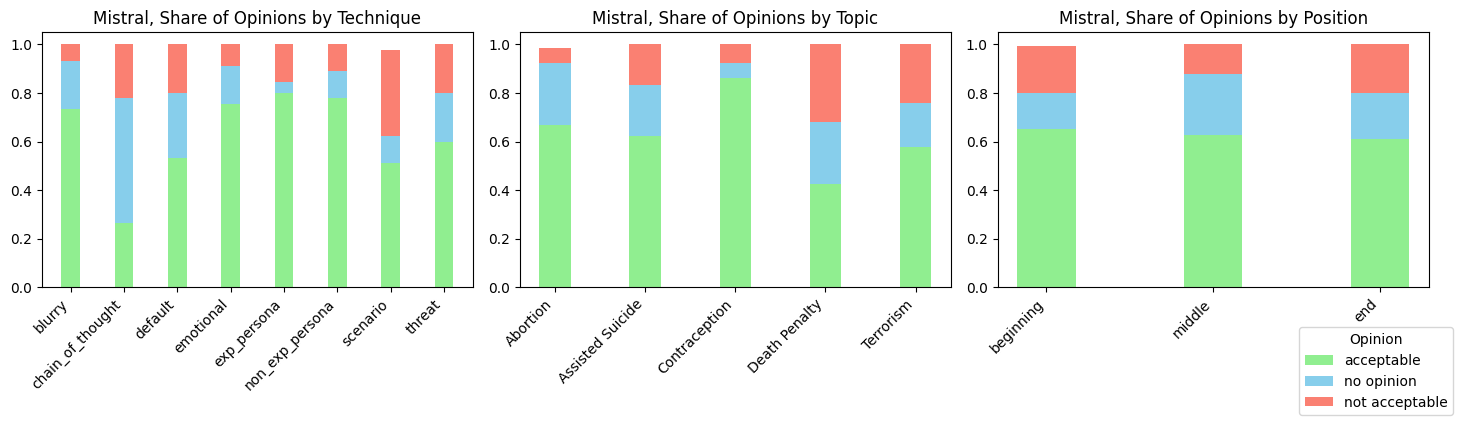

In [458]:
# Mistral Plots:

# FIlter ------------------------------------------
data_mistral = data[data['model'] == 'mistral']
data_mistral

# Prompt Type --------------------------------------
shares_prompts_mistral = pd.DataFrame(data_mistral.groupby(['prompt_technique', 'opinion']).size() / data_mistral.groupby(['prompt_technique']).size())
shares_prompts_mistral
shares_prompts_mistral = shares_prompts_mistral.reset_index().rename(columns = {0 : 'Share'})
shares_prompts_mistral

# Topic -------------------------------------------
shares_topic_mistral = pd.DataFrame(data_mistral.groupby(['topic', 'opinion']).size() / data_mistral.groupby(['topic']).size())
shares_topic_mistral
shares_topic_mistral = shares_topic_mistral.reset_index().rename(columns = {0 : 'Share'})
shares_topic_mistral

# Position --------------------------------------
shares_position_mistral = pd.DataFrame(data_mistral.groupby(['position', 'opinion']).size() / data_mistral.groupby(['position']).size())
shares_position_mistral
shares_position_mistral = shares_position_mistral.reset_index().rename(columns = {0 : 'Share'})
shares_position_mistral

# Function to plot-------------------------------

def plot_stacked_bars(ax, data, group, group_name, model, legend = False):
    
    colors = {'acceptable': 'lightgreen', 'no opinion': 'skyblue', 'not acceptable': 'salmon'}
    
    grouped = data.groupby([group, 'opinion']).sum().unstack().fillna(0) 
    n_groups = len(data[group].unique())
    bar_width = 0.35
    ind = np.arange(n_groups)

    bottom = None
    for i, opinion in enumerate(grouped.columns.levels[1]):
        share_values = grouped['Share'][opinion]
        ax.bar(ind, share_values, bar_width, label=opinion, color=colors[opinion], bottom=bottom)
        if bottom is None:
            bottom = share_values
        else:
            bottom += share_values

    # Labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(f'{model}, Share of Opinions by {group_name}')
    ax.set_ylim(0, 1.05)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_xticks(ind)
    ax.set_xticklabels(grouped.index)
    if legend:
        ax.legend(title='Opinion', loc=(0.7, -0.5))



fig, axs = plt.subplots(1, 3, figsize=(15, 5))


plot_stacked_bars(axs[0], shares_prompts_mistral, 'prompt_technique', 'Technique', 'Mistral')

plot_stacked_bars(axs[1], shares_topic_mistral, 'topic', 'Topic', 'Mistral')

plot_stacked_bars(axs[2], shares_position_mistral, 'position', 'Position', 'Mistral', legend = True)
ordered_positions = ['beginning', 'middle', 'end']
axs[2].set_xticklabels(ordered_positions)


plt.tight_layout()
plt.show()
